# LoanTap Logistic Regression

**Context**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
  1. Personal Loan
  2. EMI Free Loan
  3. Personal Overdraft
  4. Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


**Data Dictionary**

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
3. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
4. int_rate : Interest Rate on the loan
5. installment : The monthly payment owed by the borrower if the loan originates.
6. grade : LoanTap assigned loan grade
7. sub_grade : LoanTap assigned loan subgrade
8. emp_title :The job title supplied by the Borrower when applying for the loan.*
9. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
10. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
11. annual_inc : The self-reported annual income provided by the borrower during registration.
12. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
13. issue_d : The month which the loan was funded
14. loan_status : Current status of the loan - Target Variable
15. purpose : A category provided by the borrower for the loan request.
16. title : The loan title provided by the borrower
17. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
18. earliest_cr_line :The month the borrower's earliest reported credit line was opened
19. open_acc : The number of open credit lines in the borrower's credit file.
20. pub_rec : Number of derogatory public records
21. revol_bal : Total credit revolving balance
22. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
23. total_acc : The total number of credit lines currently in the borrower's credit file
24. initial_list_status : The initial listing status of the loan. Possible values are – W, F
25. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
26. mort_acc : Number of mortgage accounts.
27. pub_rec_bankruptcies : Number of public record bankruptcies
28. Address: Address of the individual

## Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')
pd.set_option('display.max_columns', None)

In [3]:
# Top 5 rows of dataframe
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# Bottom 5 rows of data
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,Verified,Jun-2010,Fully Paid,debt_consolidation,Toxic Debt Payoff,8.32,Sep-1998,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [5]:
# Random 5 rows
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
99306,3000.0,36 months,13.99,102.52,C,C4,Senior Program Analyst,< 1 year,RENT,80000.0,Not Verified,Apr-2015,Fully Paid,debt_consolidation,Debt consolidation,21.56,Sep-2003,7.0,0.0,5118.0,85.3,33.0,f,INDIVIDUAL,0.0,0.0,"92622 Ryan Extensions\r\nKleinport, MI 05113"
258974,10000.0,36 months,12.99,336.90,C,C2,Police Officer,8 years,OWN,85000.0,Source Verified,May-2016,Fully Paid,other,Other,21.88,Dec-1998,14.0,0.0,20476.0,46.1,37.0,f,INDIVIDUAL,4.0,0.0,"94549 Danielle Parks\r\nGlassville, NV 00813"
374181,15000.0,36 months,13.11,506.21,B,B4,"TRAX CONSTRUCTION, INC.",9 years,MORTGAGE,73450.0,Not Verified,Aug-2012,Fully Paid,debt_consolidation,SUMMER 2012,22.82,Jul-1997,15.0,1.0,10664.0,49.1,26.0,f,INDIVIDUAL,4.0,1.0,"7234 Debra Estates\r\nKimberlyfort, MS 48052"
148664,15000.0,36 months,14.09,513.33,B,B5,Caterpilliar,5 years,MORTGAGE,51700.0,Not Verified,Dec-2012,Fully Paid,debt_consolidation,Consolidation,18.20,Jan-1996,11.0,0.0,22478.0,82.9,20.0,f,INDIVIDUAL,1.0,0.0,"3662 Kristine Extensions\r\nWest Roy, AL 22690"
29694,7000.0,36 months,13.11,236.23,B,B4,NaN,10+ years,MORTGAGE,34000.0,Source Verified,May-2013,Fully Paid,credit_card,Credit card refinancing,24.39,Jul-2003,15.0,0.0,43521.0,30.6,22.0,f,INDIVIDUAL,0.0,0.0,"969 Smith Forges\r\nGinaside, IA 00813"


## Analyze the data

### Basic Analysis

In [6]:
# Shape of Dataframe
df.shape

(396030, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
# Number of unique values in each column
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [9]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [10]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [11]:
print(' Number of Rows: ',df.shape[0],'\n','Number of Columns: ',df.shape[1])

 Number of Rows:  396030 
 Number of Columns:  27


In [12]:
# Missing Values Treatment 
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [13]:
def missing_value_df(df):
  total_missing_df = df.isna().sum().sort_values(ascending=False)
  percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
  missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
  return missing_data_df

In [14]:
df_missing = missing_value_df(df)
df_missing[df_missing['Total'] > 0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [15]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [16]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"


In [17]:
df.title.unique()[:10]

array(['Vacation', 'Debt consolidation', 'Credit card refinancing',
       'Credit Card Refinance', 'Home improvement',
       'No More Credit Cards', 'Debt Consolidation', 'Business',
       'Major purchase', 'Debt Consolidation/Home Repairs'], dtype=object)

In [18]:
values = {"emp_title": 'Unknown', "emp_length": '< 1 year', "title": 'Unknown', "revol_util": 0, 'mort_acc': 0, 'pub_rec_bankruptcies': 0}
df = df.fillna(value=values)

### Features Creation

In [19]:
# Create Term_months from term
df['term_months'] = df['term'].apply(lambda x: int(str(x).split(' ')[1]))

# Create feature to refer Grade: Total 7 grades, so will give A-1 to G-7
grade_to_int = {'A':7, 'B':6, 'C':5, 'D':4, 'E':3, 'F':2, 'G':1}
df['grade'] = df['grade'].apply(lambda x: grade_to_int[str(x).split('-')[0]])

# Create feature to refer sub_grade: Total 35 sub_grades 
sub_grade_to_int = {'A1':35, 'A2':34, 'A3':33, 'A4':32, 'A5':31, 
                    'B1':30, 'B2':29, 'B3':28, 'B4':27, 'B5':26, 
                    'C1':25, 'C2':24, 'C3':23, 'C4':22, 'C5':21, 
                    'D1':20, 'D2':19, 'D3':18, 'D4':17, 'D5':16, 
                    'E1':15, 'E2':14, 'E3':13, 'E4':12, 'E5':11, 
                    'F1':10, 'F2':9, 'F3':8, 'F4':7, 'F5':6, 
                    'G1':5, 'G2':4, 'G3':3, 'G4':2, 'G5':1}
df['sub_grade'] = df['sub_grade'].apply(lambda x: sub_grade_to_int[str(x).split('-')[0]])

# Create continuous feature to refer emp_length
emp_len_to_int = {'10+ years': 10, '4 years': 4, '< 1 year': 0, '6 years': 6, '9 years': 9, '2 years': 2, 
                  '3 years': 3, '8 years': 8, '7 years': 7, '5 years': 5, '1 year': 1, 'nan': np.nan}
df['emp_length'] = df['emp_length'].apply(lambda x: emp_len_to_int[str(x).split('-')[0]])

# Create features from issue_d: Issue_Month and Issue_Year
mon_to_int = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                  'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12}

df['issue_d_month'] = df['issue_d'].apply(lambda x: mon_to_int[str(x).split('-')[0]])
df['issue_d_year'] = df['issue_d'].apply(lambda x: int(str(x).split('-')[1]))

# Create Features from earliest_cr_line : Month and Year
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: mon_to_int[str(x).split('-')[0]])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: int(str(x).split('-')[1]))

# Create Features - primary and Secondary from emp_title
df['emp_title_primary'] = df['emp_title'].apply(lambda x: str(x).strip().split(':')[0] if ':' in str(x) else str(x))
df['emp_title_secondary'] = df['emp_title'].apply(lambda x: str(x).strip().split(':')[1] if ':' in str(x) else 'NA')

# Removing white space from title
df['title'] = df['title'].apply(lambda x: str(x).replace(':', '').strip())

# Create Feature from Address: Pin code - last 5 characters
df['pin_code'] = df['address'].apply(lambda x: str(str(x)[len(str(x))-5:]))

# Dropping few features from which above are created 
df = df.drop(['term', 'issue_d', 'earliest_cr_line', 'emp_title', 'address'], axis=1)

In [20]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,term_months,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_title_primary,emp_title_secondary,pin_code
0,10000.0,11.44,329.48,6,27,10,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,36,1,2015,6,1990,Marketing,NA,22690
1,8000.0,11.99,265.68,6,26,4,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,36,1,2015,7,2004,Credit analyst,NA,05113
2,15600.0,10.49,506.97,6,28,0,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,36,1,2015,8,2007,Statistician,NA,05113
3,7200.0,6.49,220.65,7,34,6,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,36,11,2014,9,2006,Client Advocate,NA,00813
4,24375.0,17.27,609.33,5,21,9,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,60,4,2013,3,1999,Destiny Management Inc.,NA,11650


In [21]:
print(' Number of Rows: ',df.shape[0],'\n','Number of Columns: ',df.shape[1])

 Number of Rows:  396030 
 Number of Columns:  30


In [22]:
df['term_months'] = df['term_months'].astype('str')

In [23]:
df['pin_code'] = df['pin_code'].astype('str')

In [24]:
df.dtypes

loan_amnt                 float64
int_rate                  float64
installment               float64
grade                       int64
sub_grade                   int64
emp_length                  int64
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
title                      object
dti                       float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status        object
application_type           object
mort_acc                  float64
pub_rec_bankruptcies      float64
term_months                object
issue_d_month               int64
issue_d_year                int64
earliest_cr_line_month      int64
earliest_cr_line_year       int64
emp_title_primary          object
emp_title_secondary        object
pin_code      

In [25]:
numeric_cols = []
cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)
  else:
    numeric_cols.append(col)

In [26]:
print(f'Categorical Columns: {cat_cols}')
print(f'Continuous Columns: {numeric_cols}')

Categorical Columns: ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'term_months', 'emp_title_primary', 'emp_title_secondary', 'pin_code']
Continuous Columns: ['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']


### Univariate Analysis

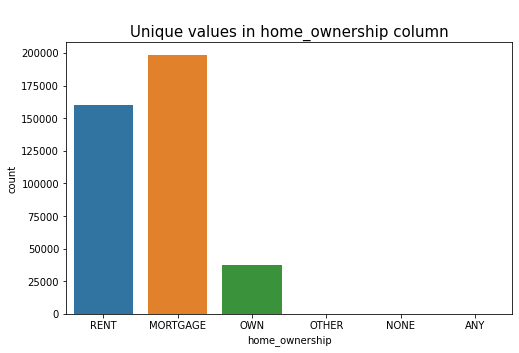

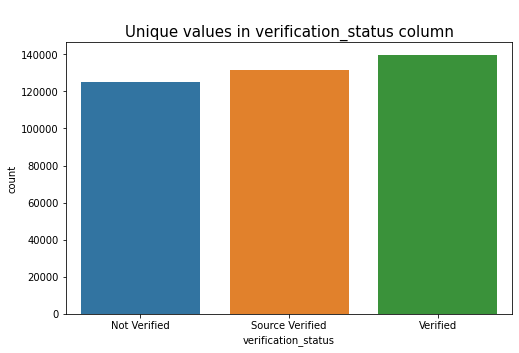

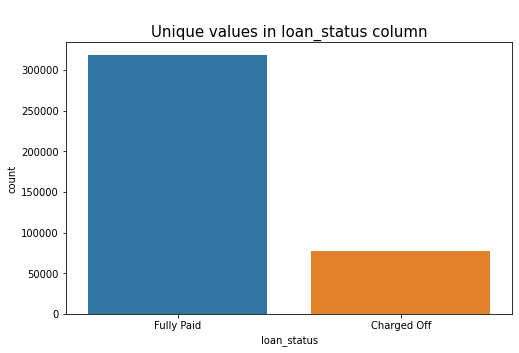

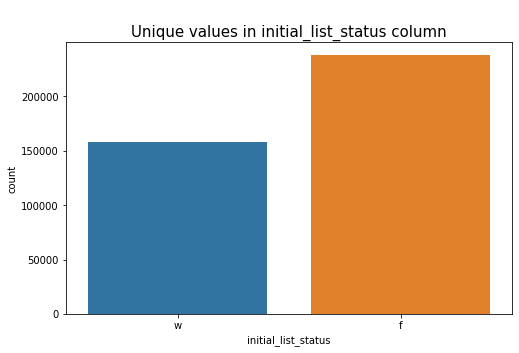

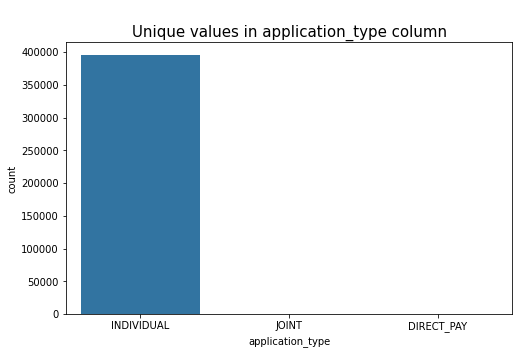

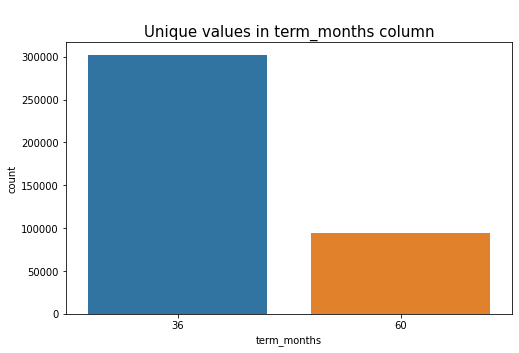

In [27]:
# Categorical Univariate Analysis
# Number of unique values less than 10 in only 5 features, which are: 

cat_cols = ['home_ownership','verification_status','loan_status','initial_list_status','application_type','term_months']
for column in cat_cols:
  plt.figure(figsize = (8,5))
  sns.countplot(data=df, x=column)
  plt.title(f"\nUnique values in {column} column",fontsize=15)
  plt.show()

In [28]:
for column in cat_cols:
  print(df[column].value_counts())
  print('\n')

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64


Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64


Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


f    238066
w    157964
Name: initial_list_status, dtype: int64


INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


36    302005
60     94025
Name: term_months, dtype: int64




<Figure size 720x432 with 0 Axes>

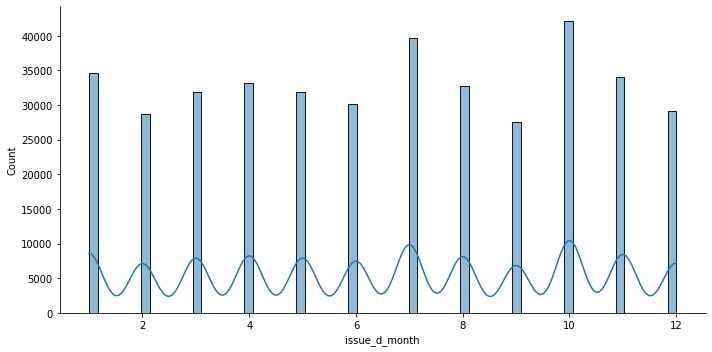

<Figure size 720x432 with 0 Axes>

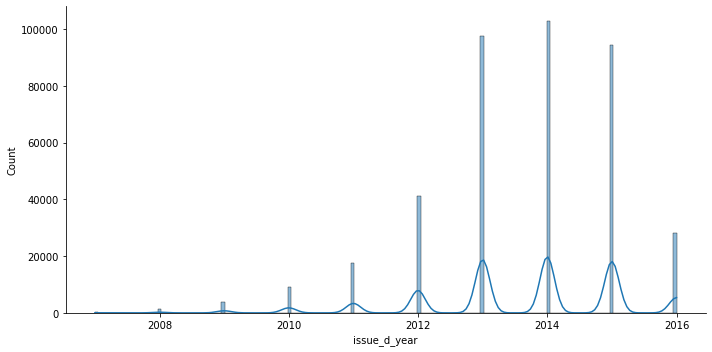

<Figure size 720x432 with 0 Axes>

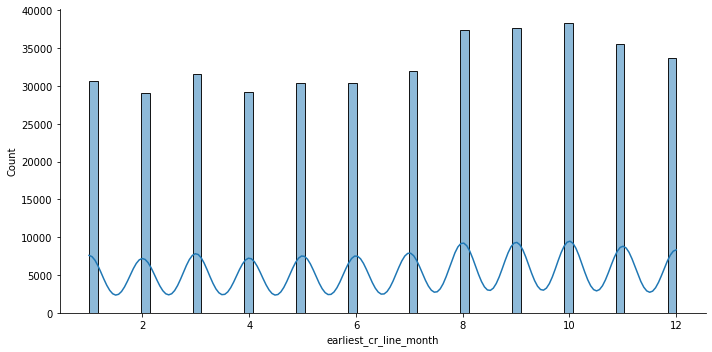

<Figure size 720x432 with 0 Axes>

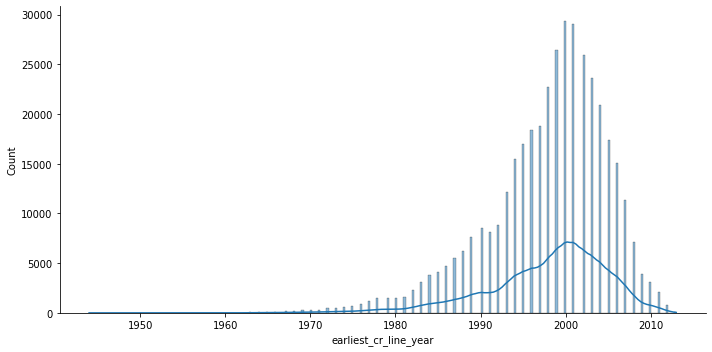

<Figure size 720x432 with 0 Axes>

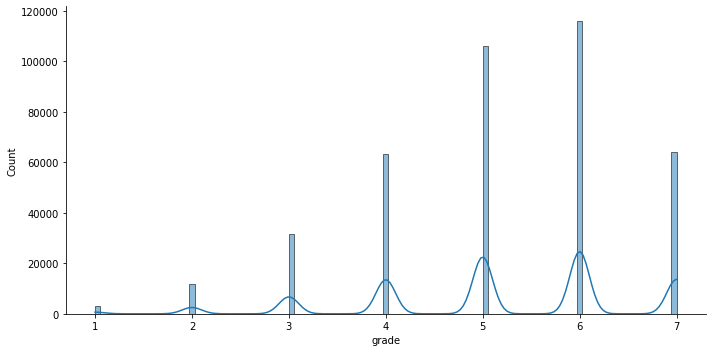

<Figure size 720x432 with 0 Axes>

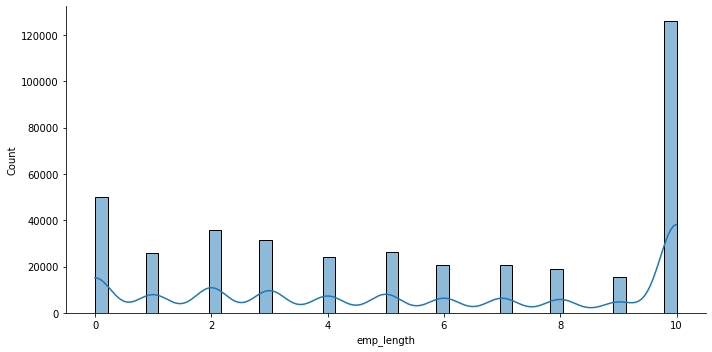

<Figure size 720x432 with 0 Axes>

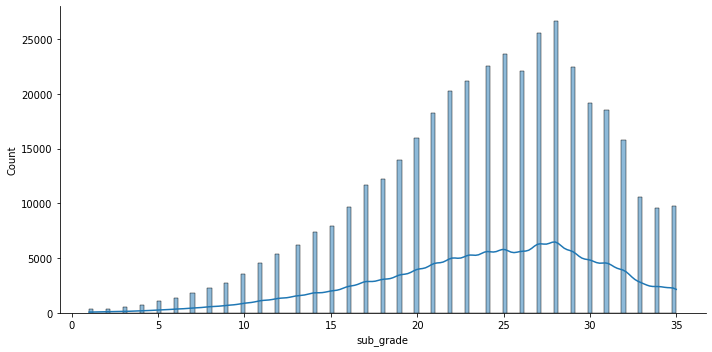

In [29]:
# Distribution plot for discrete variables

discrete_cols = ['issue_d_month','issue_d_year','earliest_cr_line_month','earliest_cr_line_year',
                 'grade','emp_length','sub_grade']
for col in discrete_cols:
  plt.figure(figsize=(10,6))
  sns.color_palette("flare", as_cmap=True)
  sns.displot(df[col],kde=True,height=5,aspect=2)
  plt.show()

<Figure size 720x432 with 0 Axes>

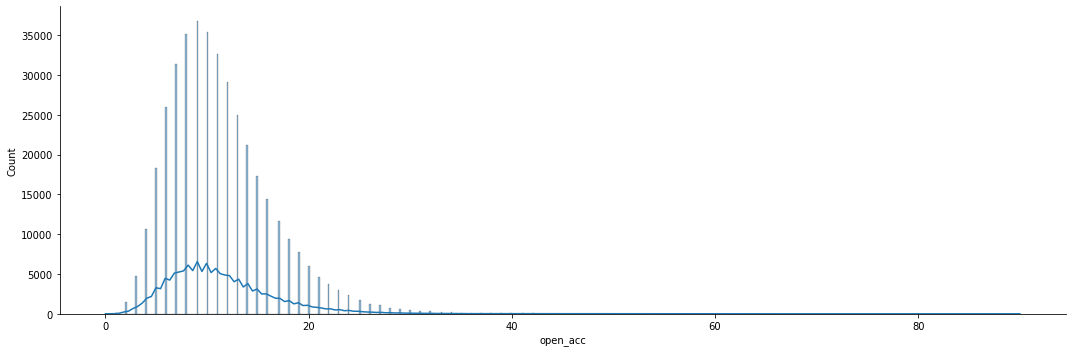

<Figure size 720x432 with 0 Axes>

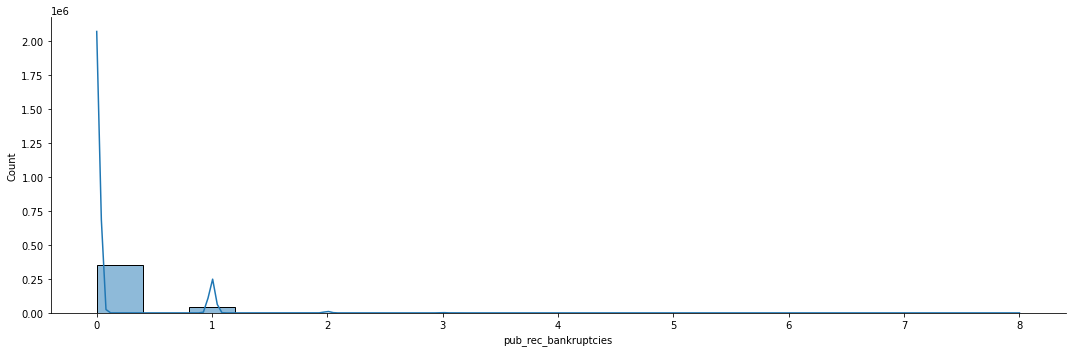

<Figure size 720x432 with 0 Axes>

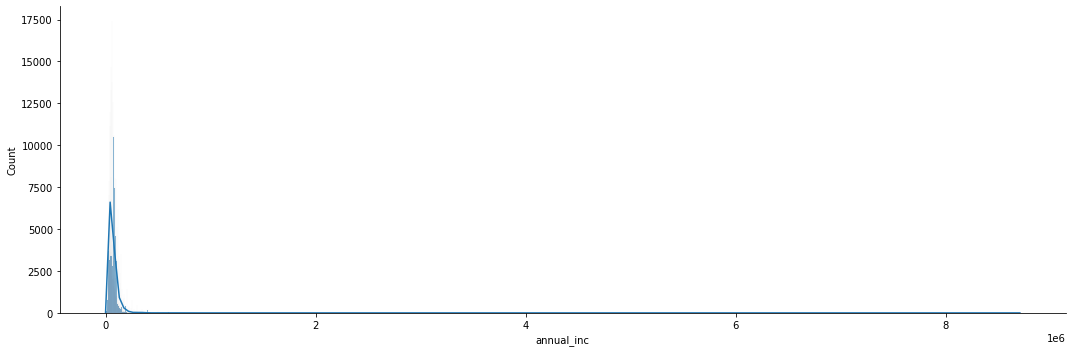

<Figure size 720x432 with 0 Axes>

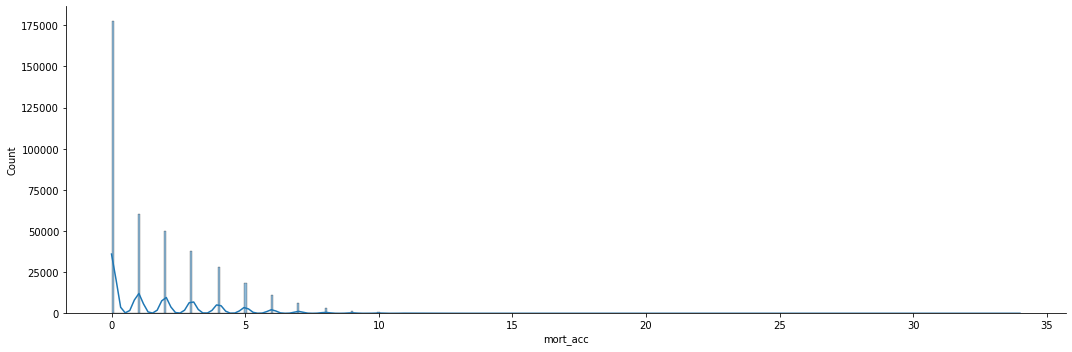

<Figure size 720x432 with 0 Axes>

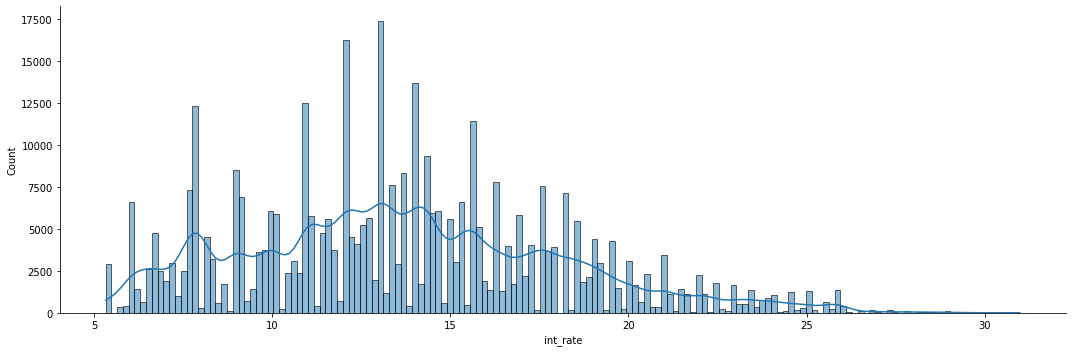

<Figure size 720x432 with 0 Axes>

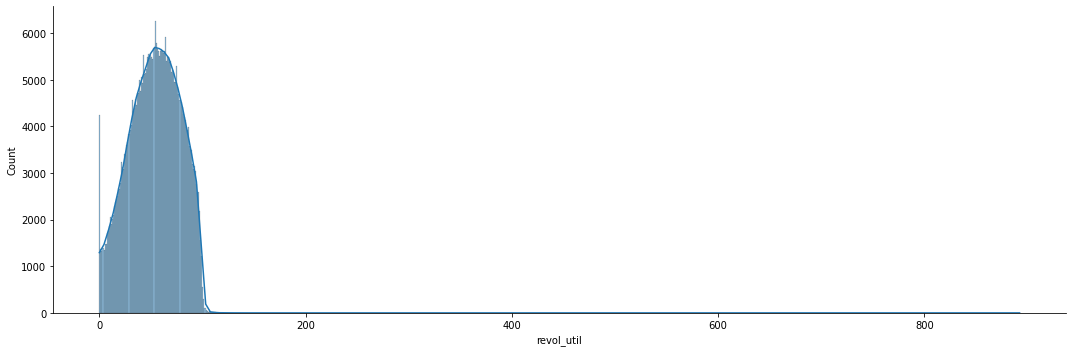

<Figure size 720x432 with 0 Axes>

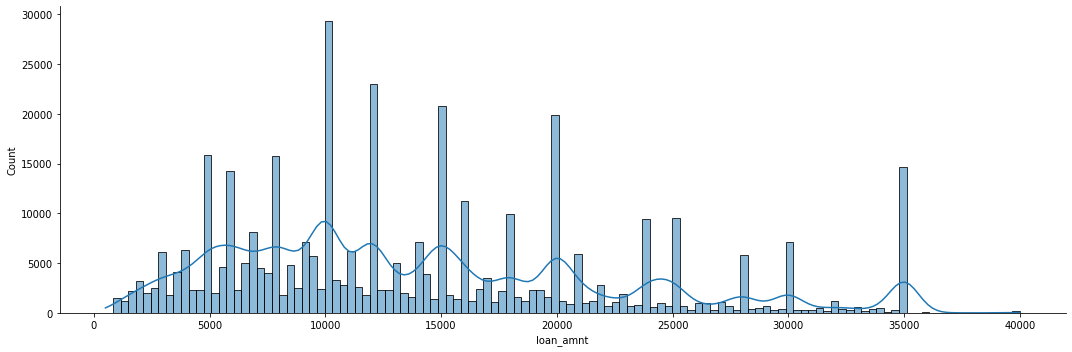

<Figure size 720x432 with 0 Axes>

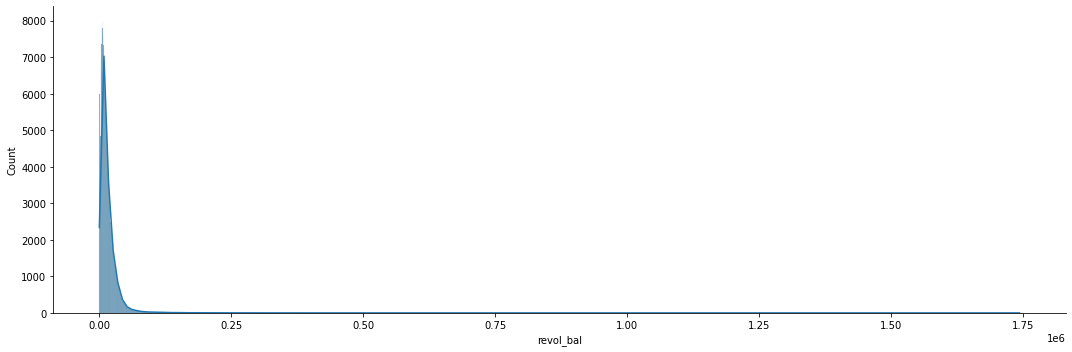

<Figure size 720x432 with 0 Axes>

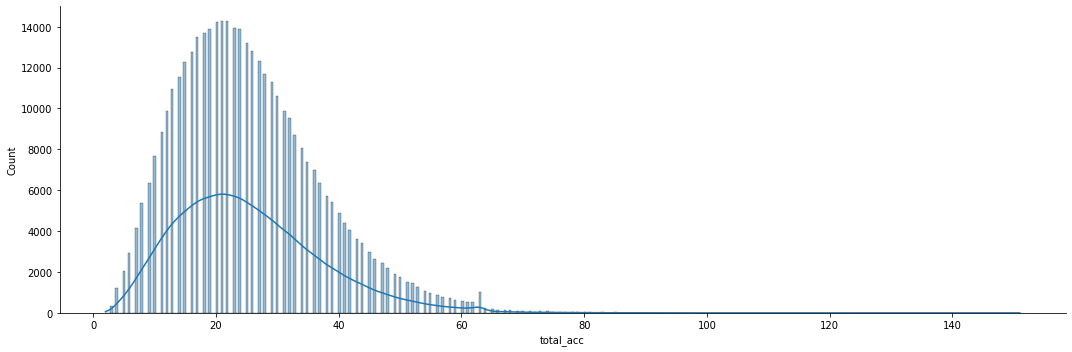

<Figure size 720x432 with 0 Axes>

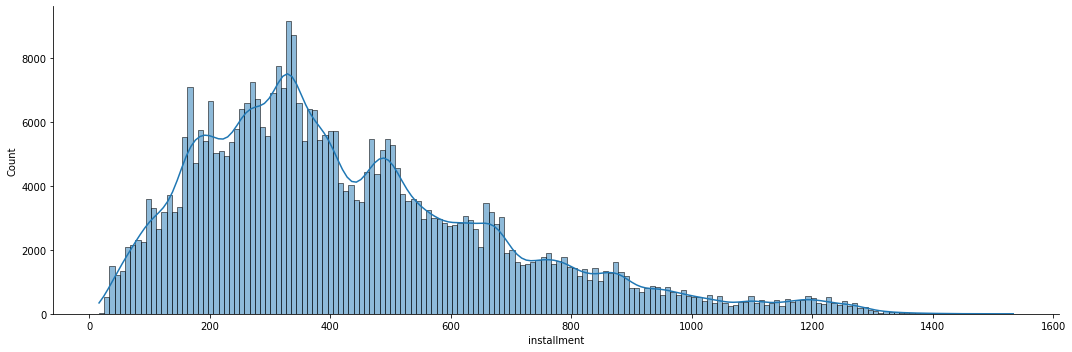

<Figure size 720x432 with 0 Axes>

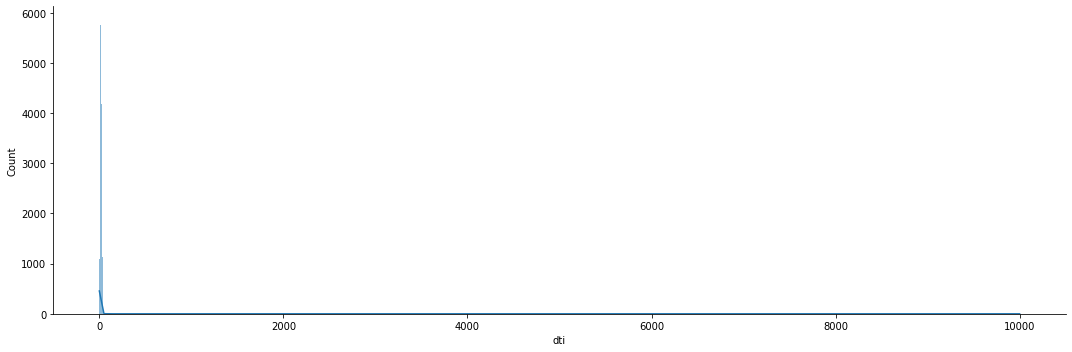

<Figure size 720x432 with 0 Axes>

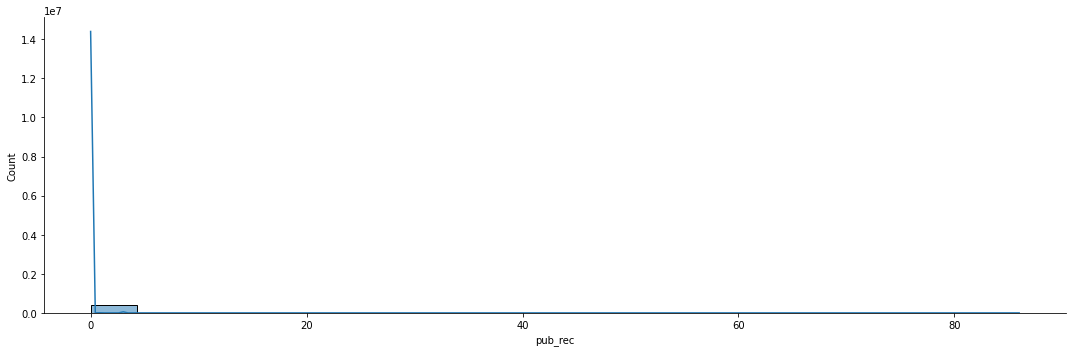

In [30]:
# Distribution plot for continuous variables

num_cols = []
set1 = set(numeric_cols)
set2 = set(discrete_cols)
num_cols = list(set1 - set2)

for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.displot(df[col], kde=True, height=5, aspect=3)
  plt.show()

### Bi-variate Analysis

In [31]:
columns = ['verification_status','loan_status','initial_list_status','application_type','term_months',
           'home_ownership']

num_columns = ['int_rate','loan_amnt','installment','grade','sub_grade','emp_length','annual_inc','dti',
               'pub_rec_bankruptcies','revol_util','pub_rec']

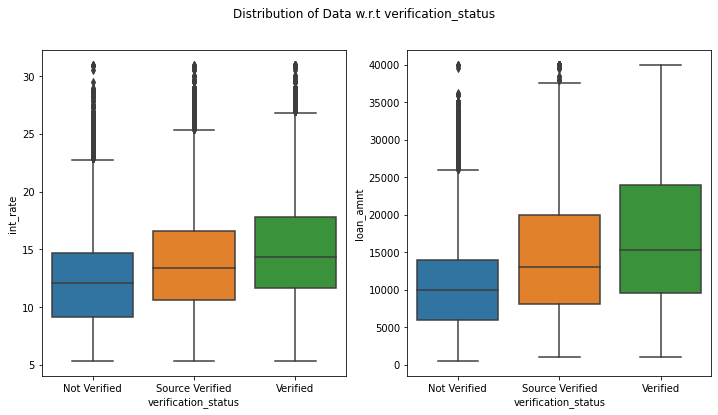

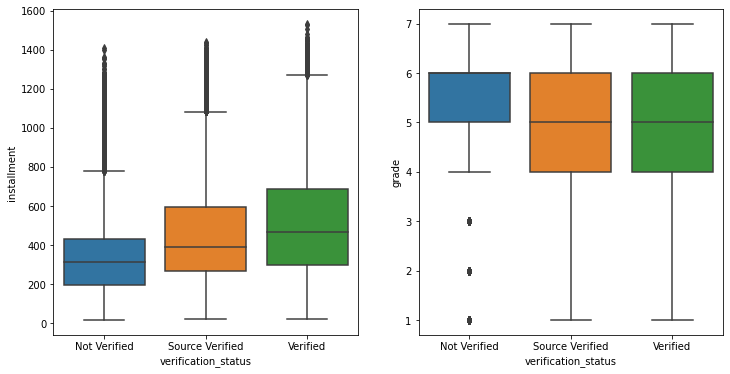

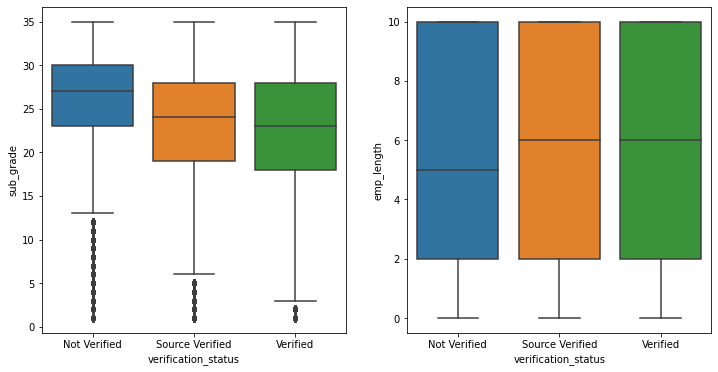

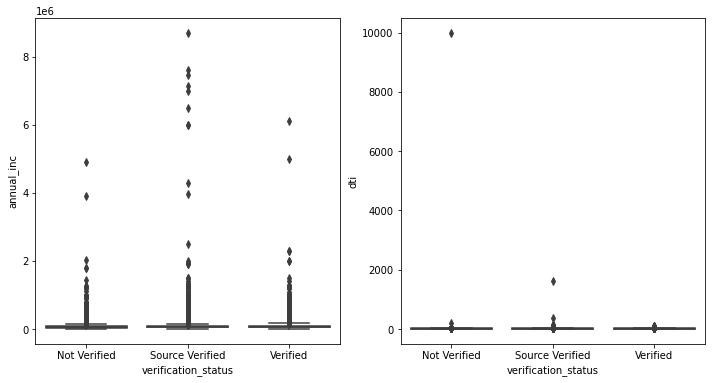

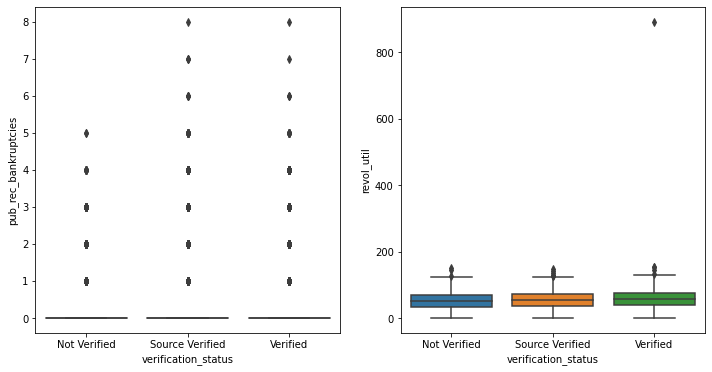

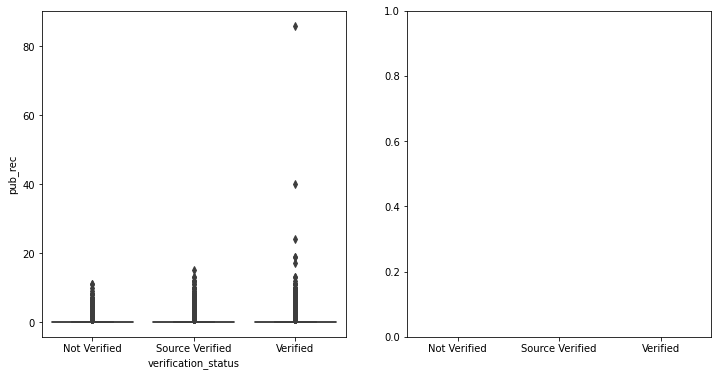

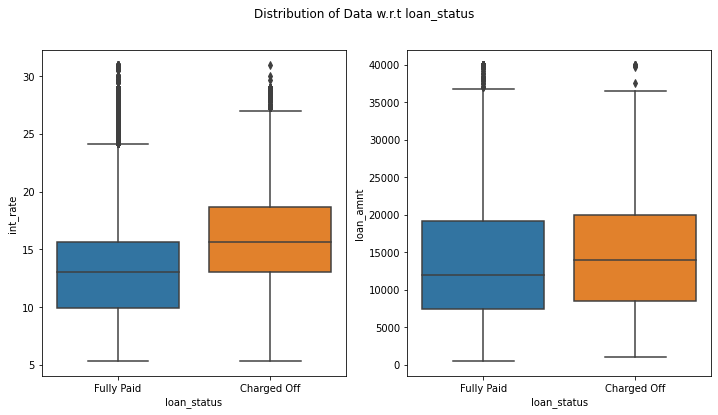

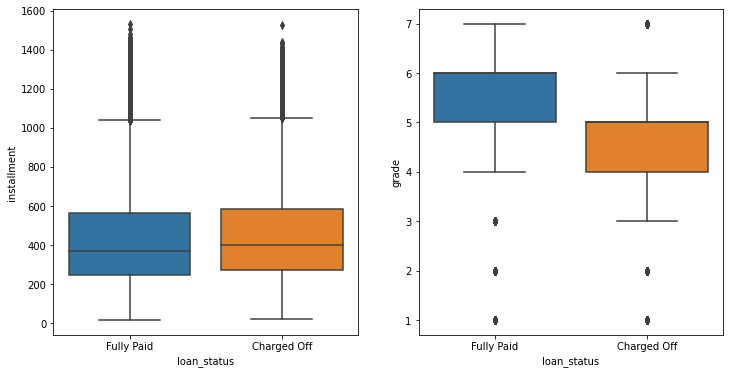

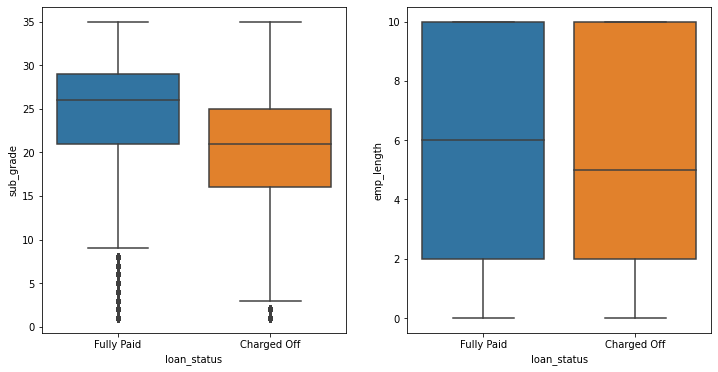

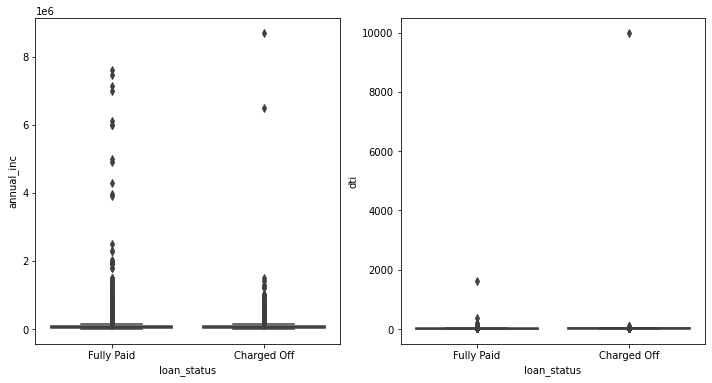

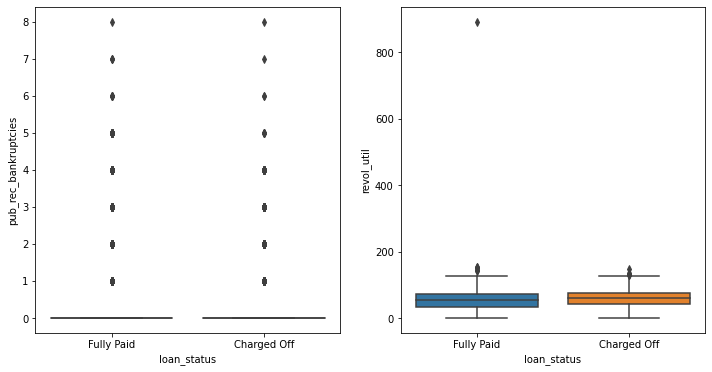

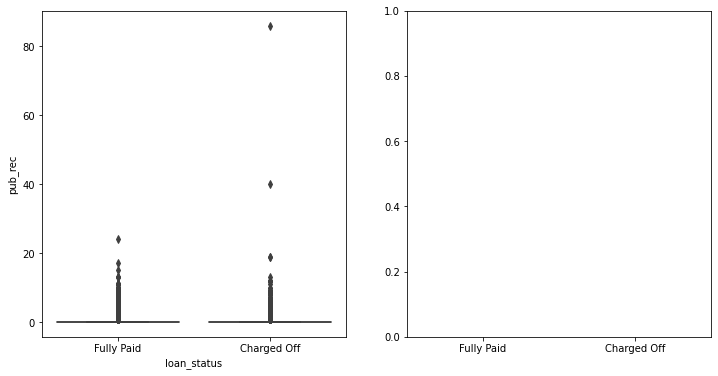

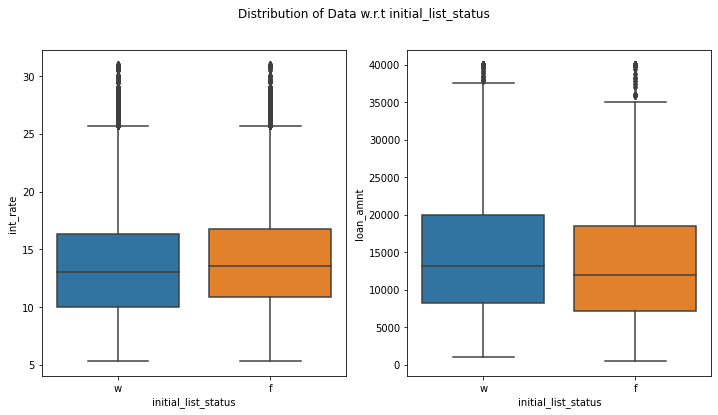

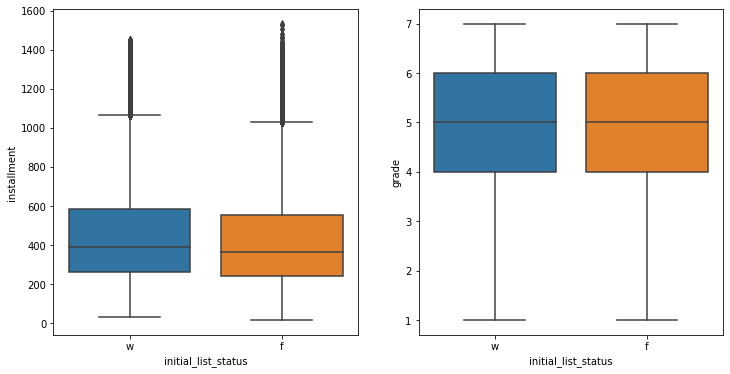

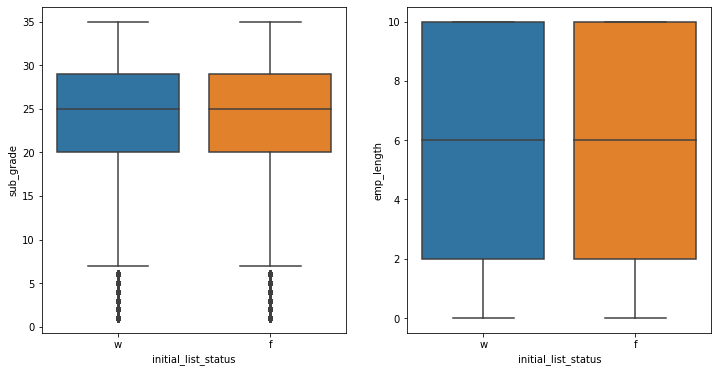

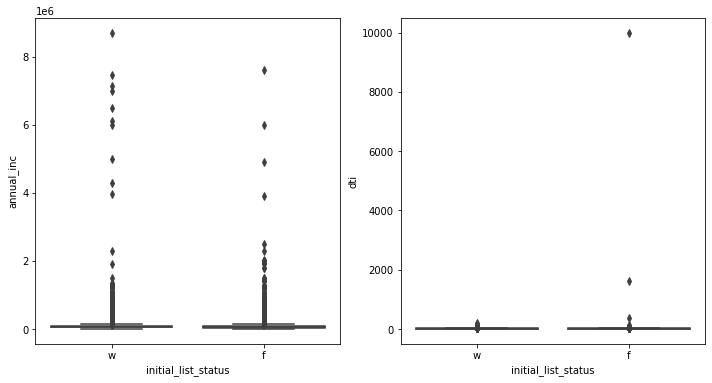

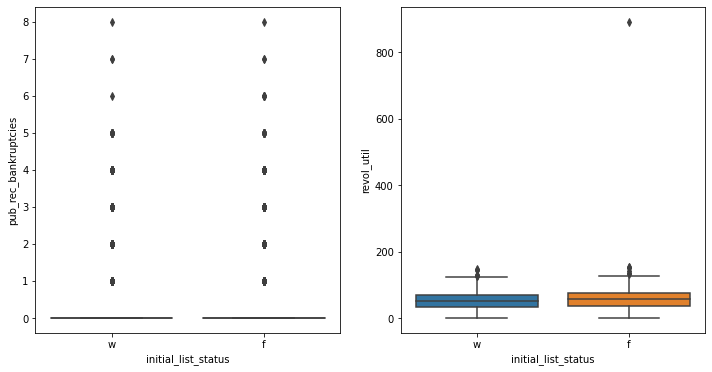

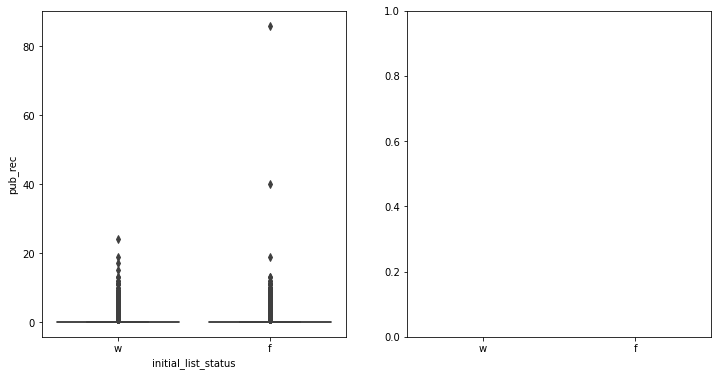

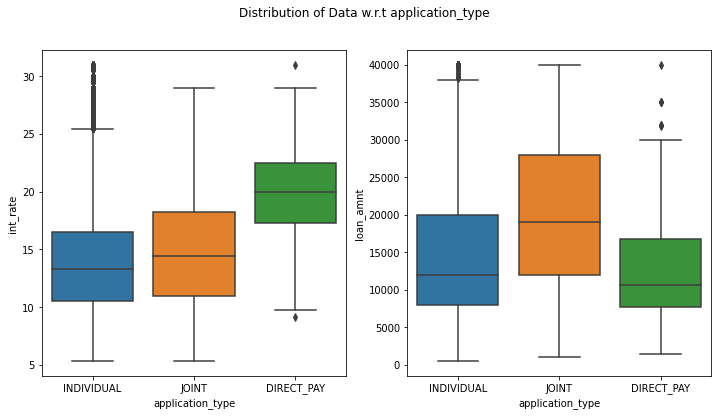

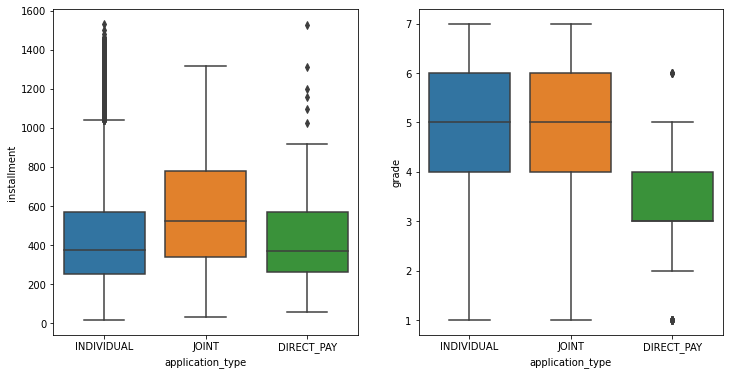

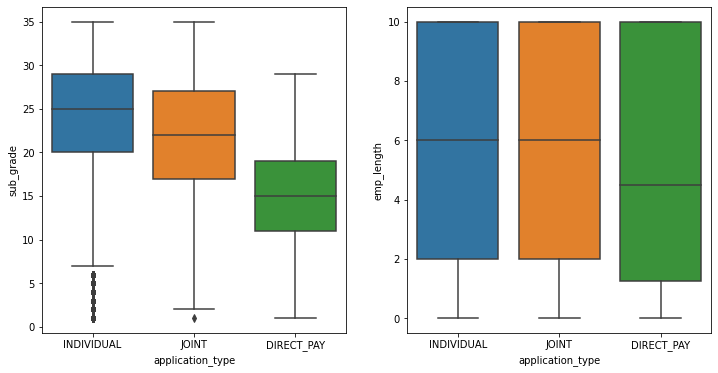

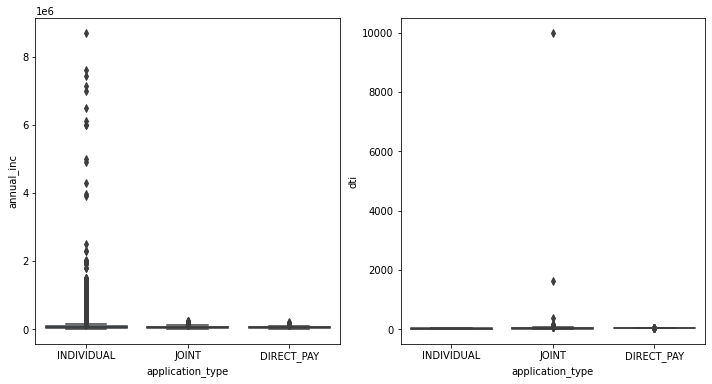

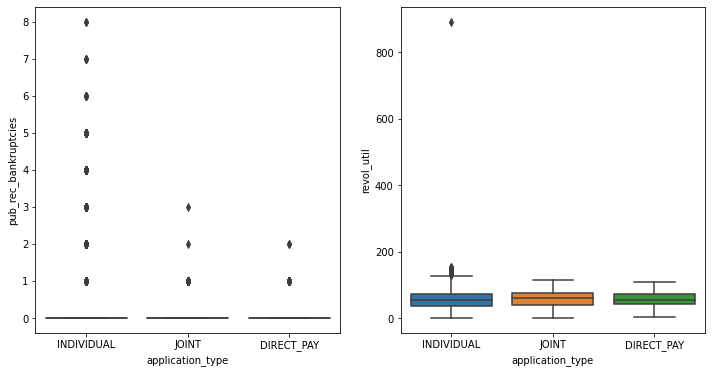

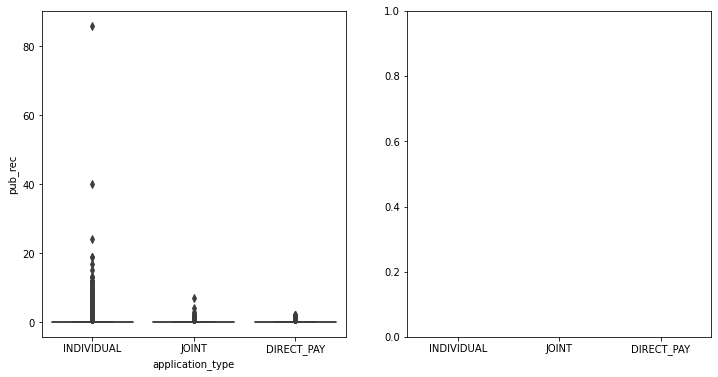

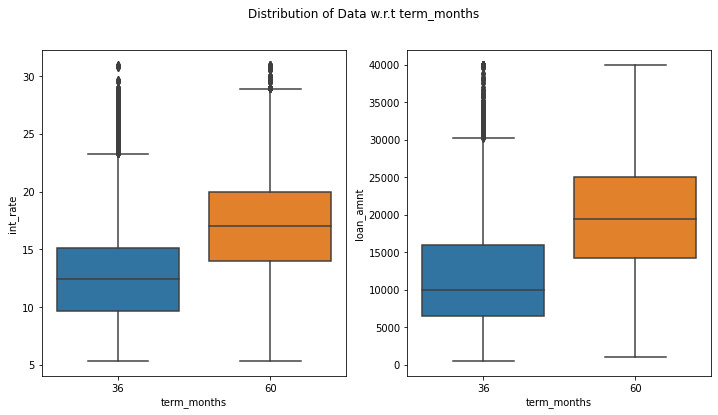

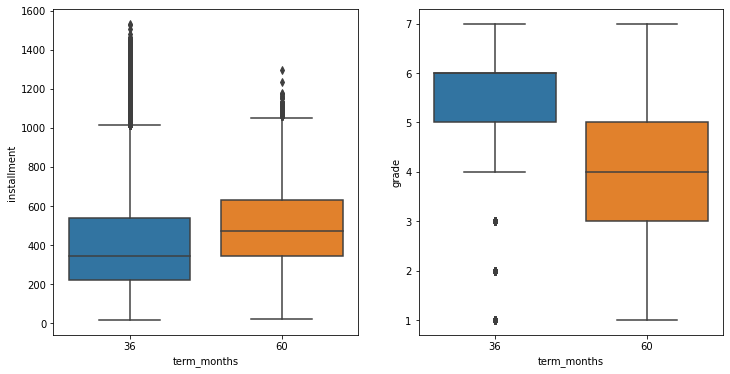

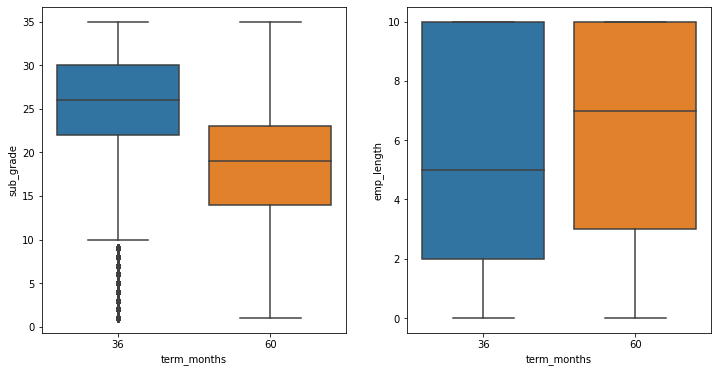

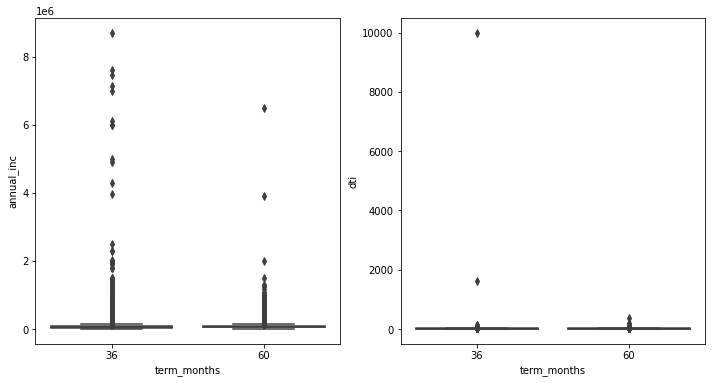

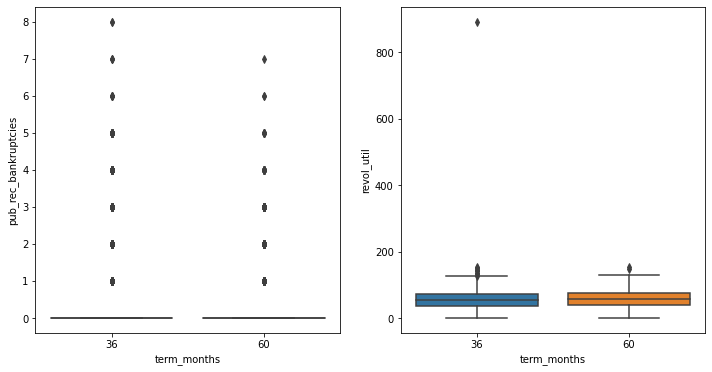

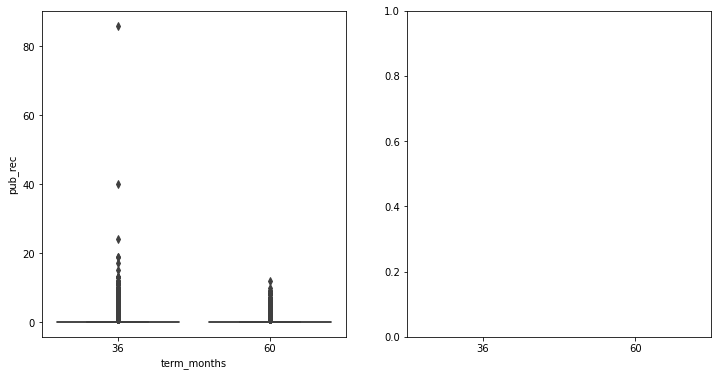

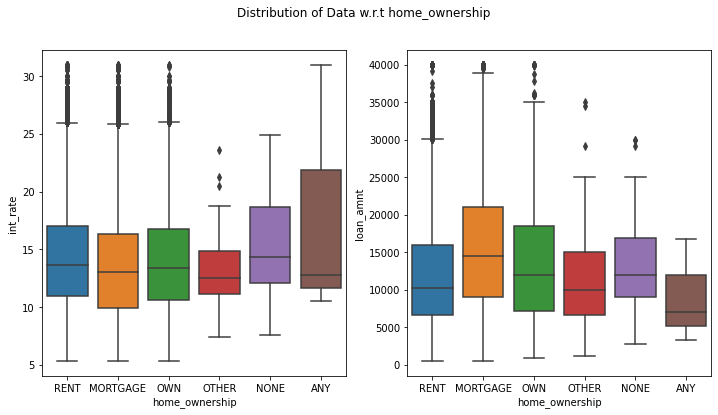

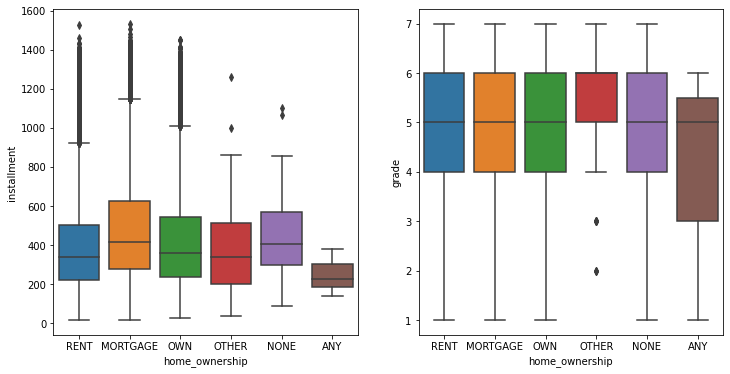

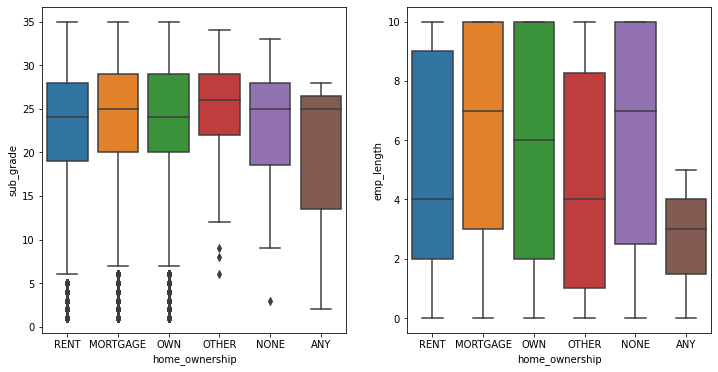

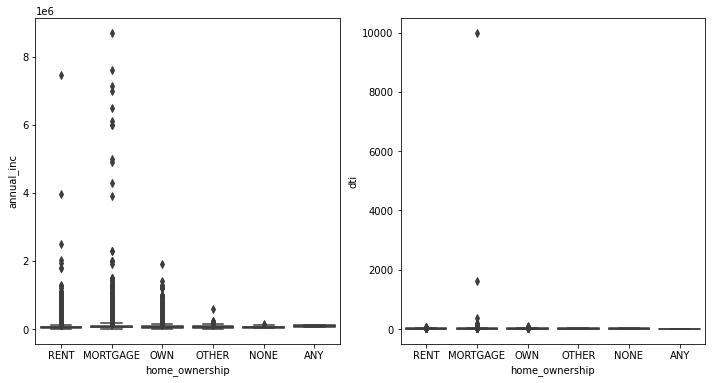

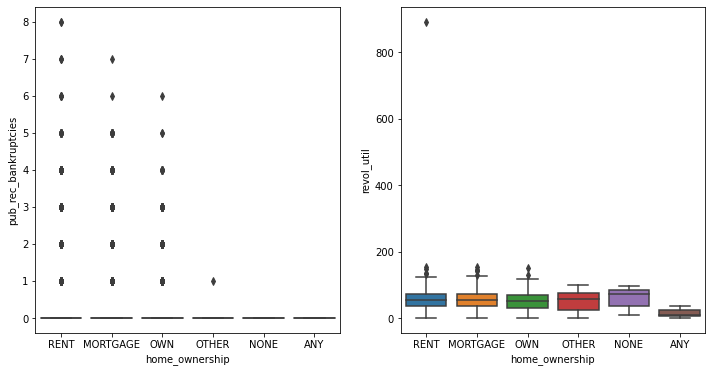

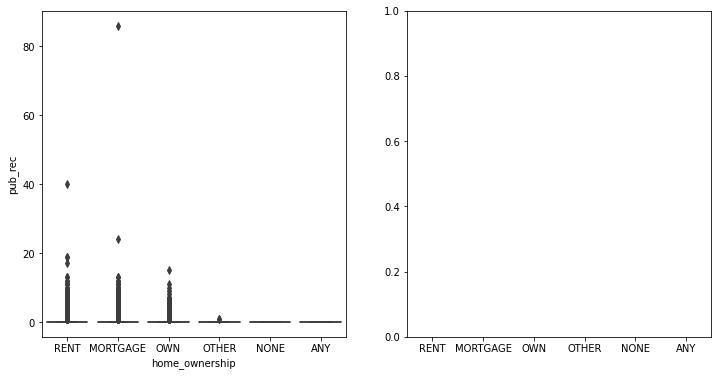

In [32]:
for category in columns:
    column_index = 0
    while column_index < len(num_columns):
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,6))
        if  column_index == 0:
            fig.suptitle(f"Distribution of Data w.r.t {category} ")
        sns.boxplot(data=df, y=num_columns[column_index], ax=axes[0], x=category)
        column_index += 1
        if column_index < len(num_columns):
            sns.boxplot(data=df, y=num_columns[column_index], ax=axes[1], x=category)
            column_index += 1
        plt.show()

### Outlier Analysis

In [33]:
def remove_outlier(df_in, col_name, thresh=5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_fraction = (len(df_in)-len(df_out))/len(df_in)
    if outlier_fraction > 0.0:
        fig, axes = plt.subplots(1, 1, sharex=True, figsize=(15,6))
        sns.boxplot(data=df_in, y=col_name)
        if outlier_fraction <= thresh/100:
            fig.suptitle(f"Outliers constitute {round(outlier_fraction*100, 2)}% of data for column '{col_name}'. Hence removing outliers.")
            plt.show()
            return df_out
        else:
            fig.suptitle(f"Outliers constitute significant amount of data ({round(outlier_fraction*100, 2)}%) for column '{col_name}'. Hence not removing outliers..")
            plt.show()
            return df_in
    else:
        return df_in

In [34]:
numeric_columns = []
type = ['int64', 'float64']
for col in df.columns: 
  if df[col].dtype in type:
    numeric_columns.append(col)

In [35]:
numeric_columns

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

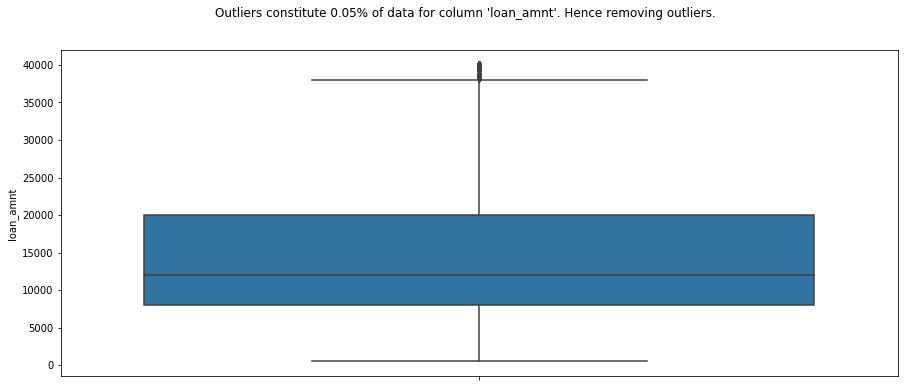

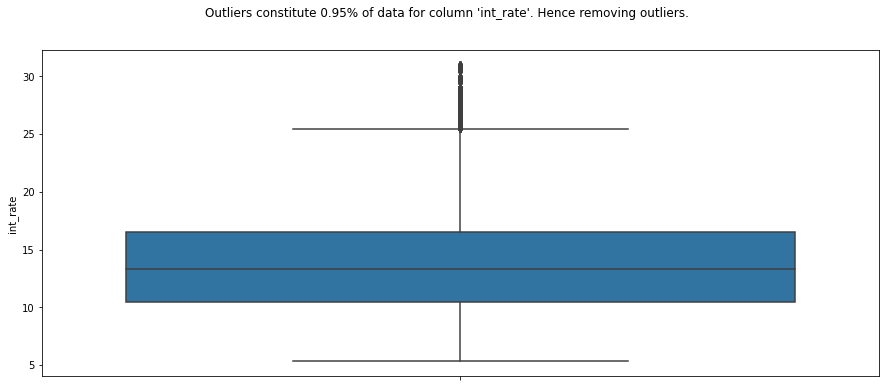

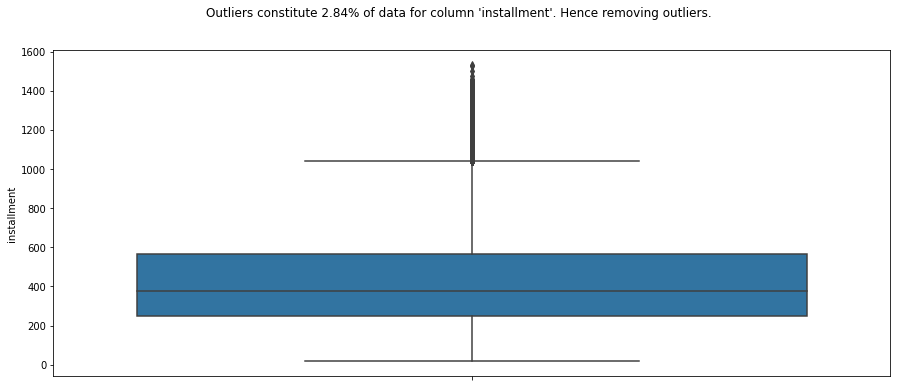

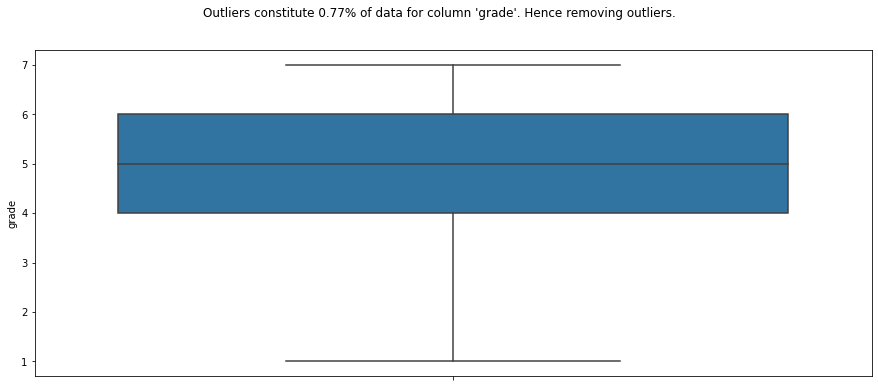

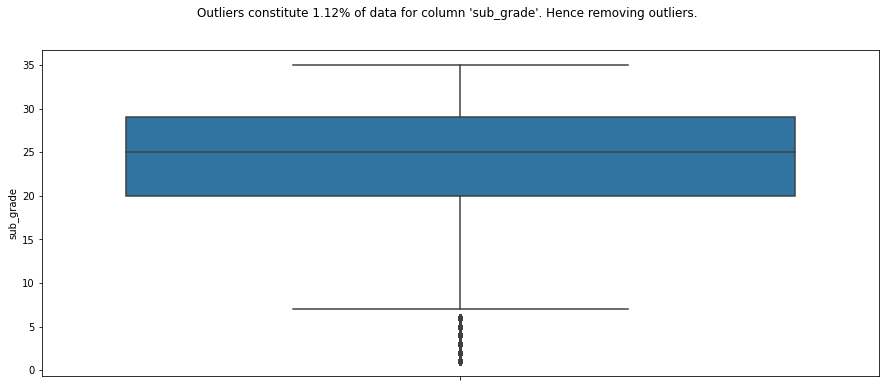

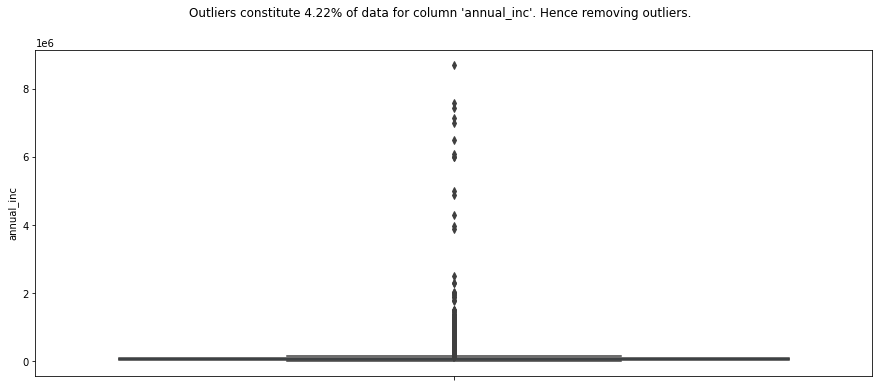

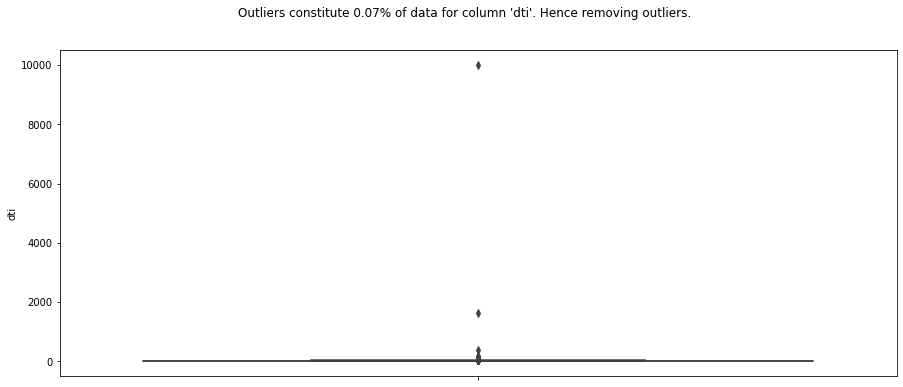

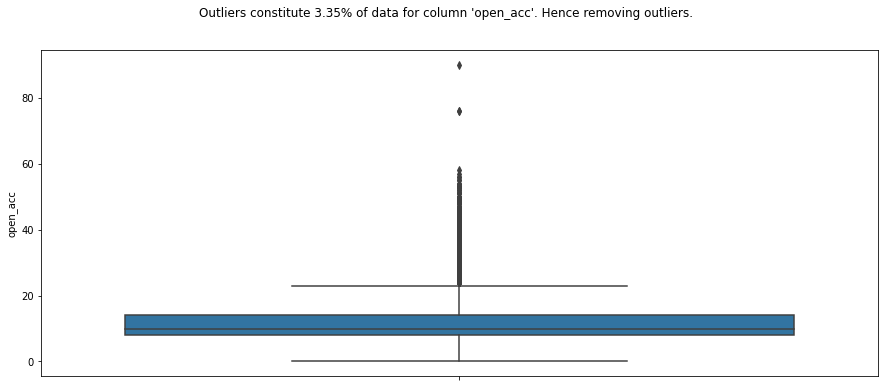

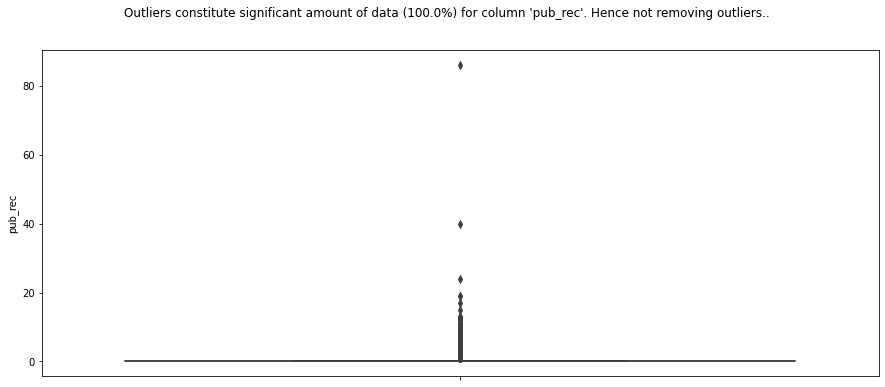

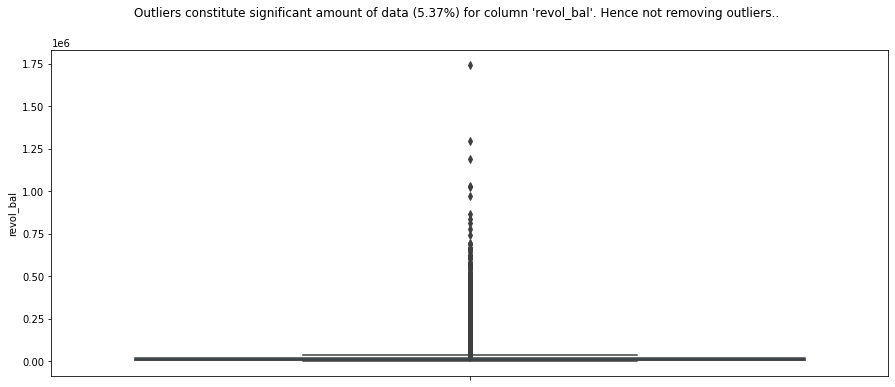

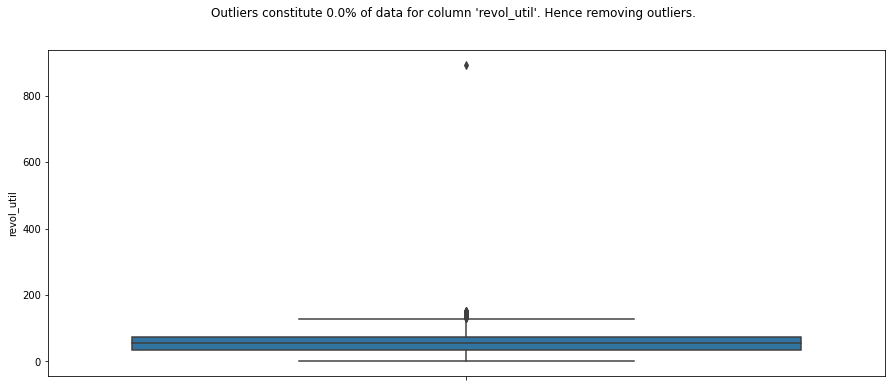

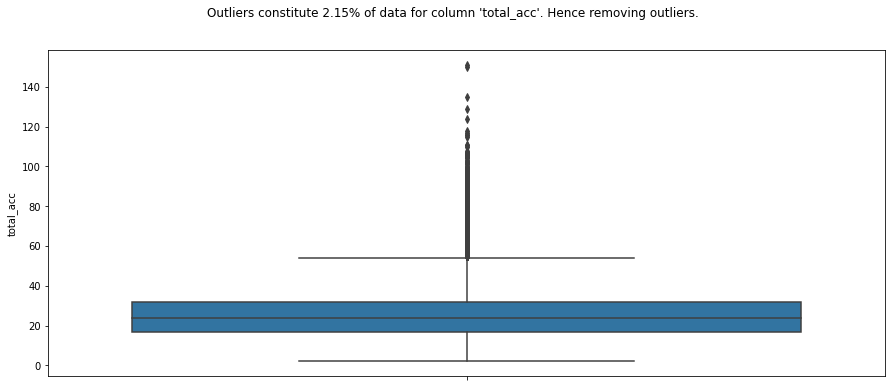

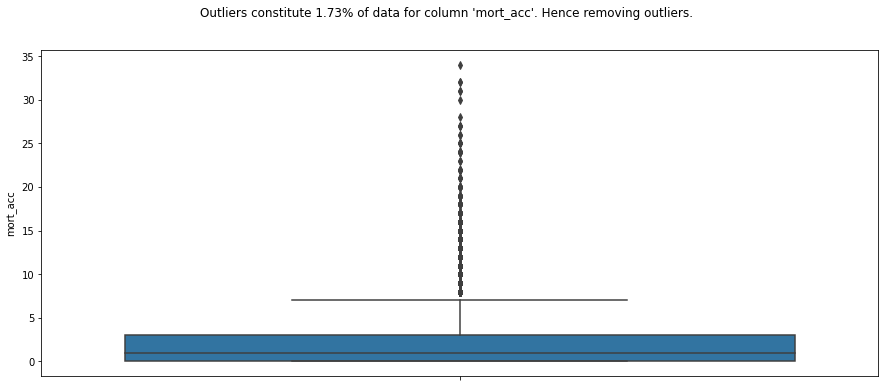

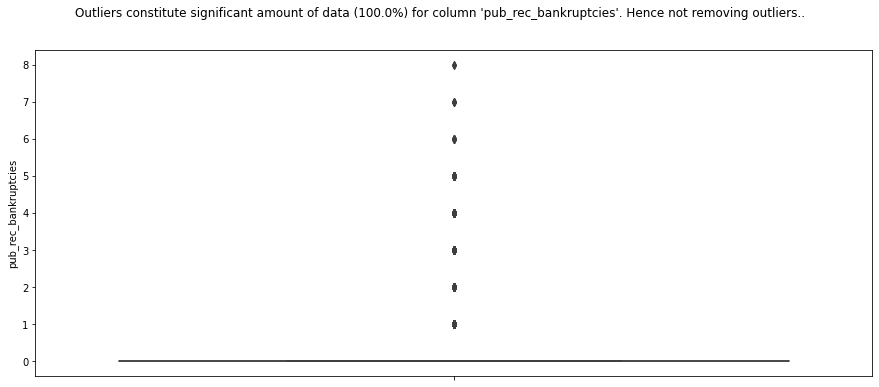

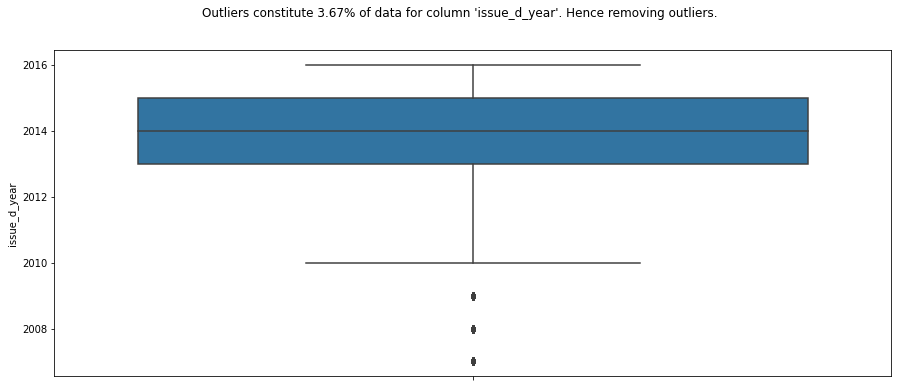

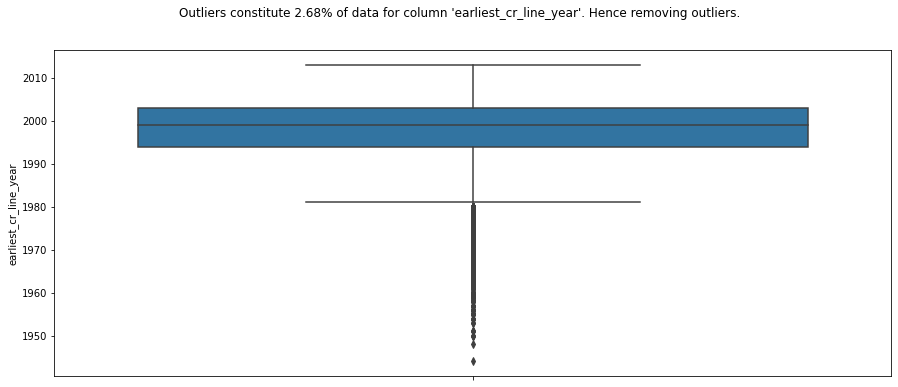

In [36]:
for column in numeric_columns:
  remove_outlier(df,column)

### MultiVariate Analysis - Correlation between Column

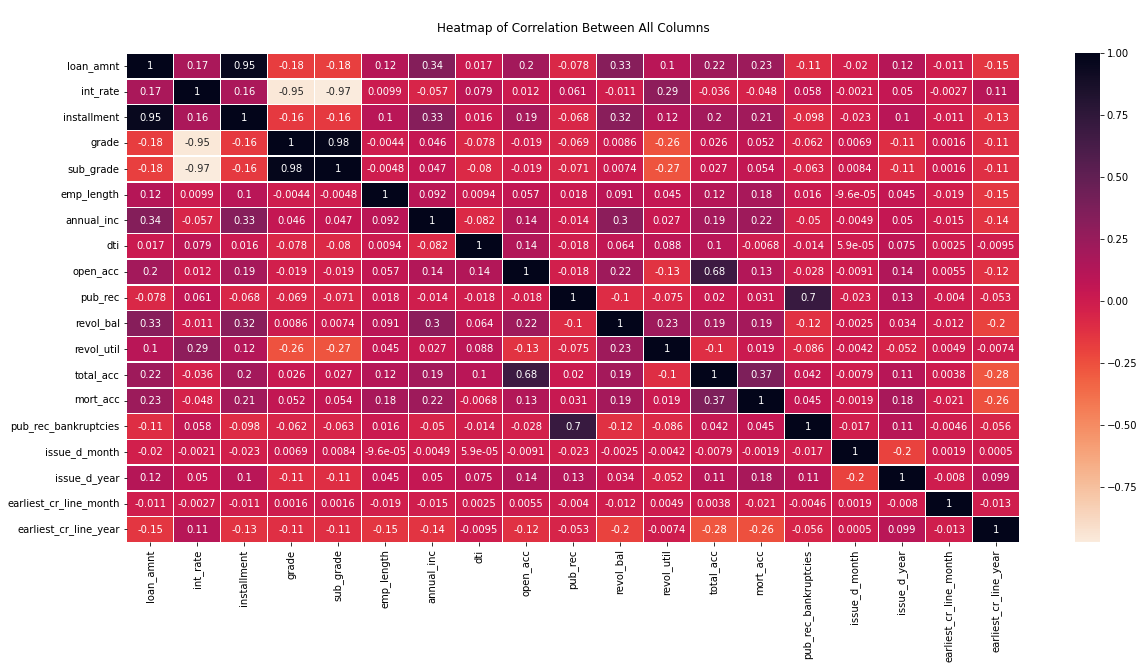

In [38]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n")
plt.show()

## Hypothesis Testing

In [39]:
charged_off = df[df['loan_status']=='Charged Off']
fully_paid = df[df['loan_status']=='Fully Paid']

### Comparison of Loan status for different Interest Rates

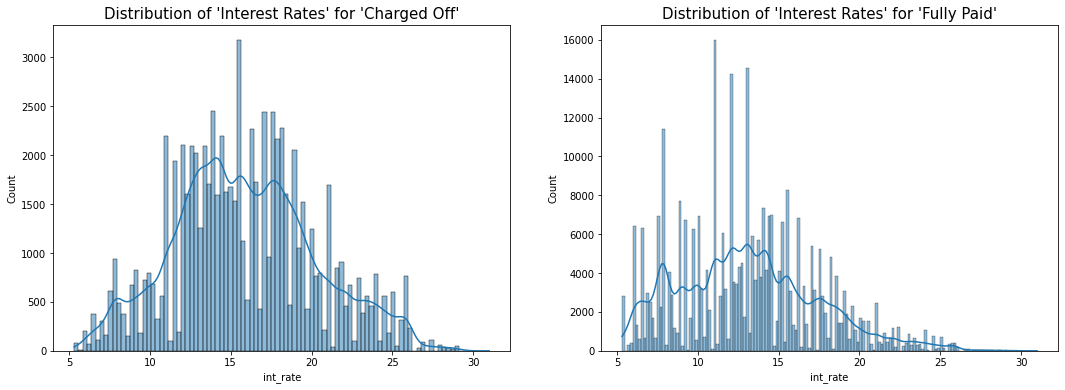

In [40]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(charged_off['int_rate'], kde=True, ax=axes[0]).set_title("Distribution of 'Interest Rates' for 'Charged Off'", fontsize=15)
sns.histplot(fully_paid['int_rate'], kde=True, ax=axes[1]).set_title("Distribution of 'Interest Rates' for 'Fully Paid'", fontsize=15)
plt.show()

- Distributions doesn't look so gaussian, but proceeding for t-test as data is huge

In [41]:
charged_off_var = np.std(charged_off['int_rate'])**2
fully_paid_var = np.std(fully_paid['int_rate'])**2

print(f'Variance of int_rates for those who were Charged off: {charged_off_var}')
print(f'Vairance of int_rates for those who were Fully paid: {fully_paid_var}')

Variance of int_rates for those who were Charged off: 19.255484563038205
Vairance of int_rates for those who were Fully paid: 18.65460729593216


- Variance of two datasets are almost equal, so moving forward with 2-sample t-test

- **Null Hypothesis (H0):**The mean difference of 'Interest Rates' between unpaired observations for 'Charged Off and Paid Off' loans is zero.

- **Alternate Hypothesis (H1):**The mean of 'Interest Rates' for unpaired observations of 'Charged Off' loans is grater than 'Paid Off' loans.

- **Significance level (alpha):** 0.05


In [42]:
import scipy.stats as stats

stats.ttest_ind(charged_off['int_rate'].sample(100), fully_paid['int_rate'].sample(100), equal_var=False,  alternative='greater')

Ttest_indResult(statistic=5.43009541493704, pvalue=8.34073090304629e-08)

- P-value is very less than the significant value or threshold, hence, Interest rate has significant impact on Loan Status

### Comparison of Loan status for different Grades

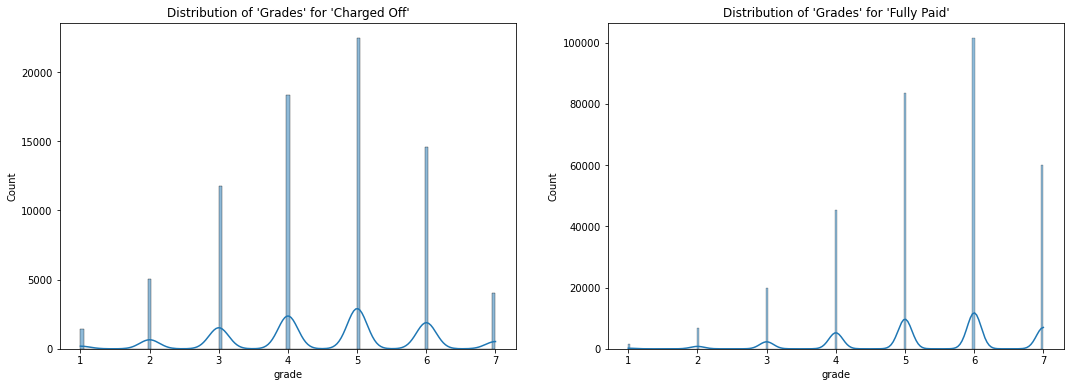

In [43]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(charged_off['grade'], kde=True, ax=axes[0]).set_title("Distribution of 'Grades' for 'Charged Off'")
sns.histplot(fully_paid['grade'], kde=True, ax=axes[1]).set_title("Distribution of 'Grades' for 'Fully Paid'")
plt.show()

- Distributions doesn't look so gaussian, but proceeding for t-test as data is huge

In [44]:
charged_off_grade_var = np.std(charged_off['grade'])**2
fully_paid_grade_var = np.std(fully_paid['grade'])**2

print(f'Variance of grades for those who were Charged off: {charged_off_grade_var}')
print(f'Vairance of grades for those who were Fully paid: {fully_paid_grade_var}')

Variance of grades for those who were Charged off: 1.8548216478759807
Vairance of grades for those who were Fully paid: 1.6140539796906528


- Variance of the grades are almost equal for both Charged-off and Fully paid

- **Null Hypothesis (H0):**The mean difference of 'Grades' between unpaired observations for 'Charged Off and Paid Off' loans is zero.

- **Alternate Hypothesis (H1):**The mean of 'Grades' for unpaired observations of 'Charged Off' loans is grater than 'Paid Off' loans.

- **Significance level (alpha):** 0.05


In [45]:
import scipy.stats as stats

stats.ttest_ind(fully_paid['grade'].sample(100), charged_off['grade'].sample(100), equal_var=False,  alternative='greater')

Ttest_indResult(statistic=6.389888652453226, pvalue=6.223644673009619e-10)

- p-value is much less than the significant value, hence rejecting NULL HYPOTHESIS. 

**Grades have significant impact on Loan Status**

### Comparison of Loan status for different Sub-grades

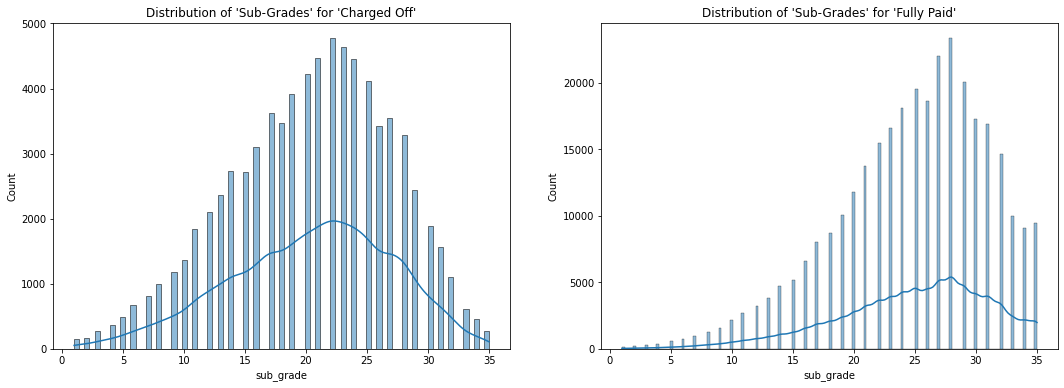

In [46]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(charged_off['sub_grade'], kde=True, ax=axes[0]).set_title("Distribution of 'Sub-Grades' for 'Charged Off'")
sns.histplot(fully_paid['sub_grade'], kde=True, ax=axes[1]).set_title("Distribution of 'Sub-Grades' for 'Fully Paid'")
plt.show()

- Distributions are kinda gaussian with a little skewness, but proceeding for t-test as sample size is significantly huge

In [47]:
charged_off_subgrade_var = np.std(charged_off['sub_grade'])**2
fully_paid_subgrade_var = np.std(fully_paid['sub_grade'])**2

print(f'Variance of sub-grades for those who were Charged off: {charged_off_subgrade_var}')
print(f'Vairance of sub-grades for those who were Fully paid: {fully_paid_subgrade_var}')

Variance of sub-grades for those who were Charged off: 44.85838146837489
Vairance of sub-grades for those who were Fully paid: 39.510614498680226


- **Null Hypothesis (H0):**The mean difference of 'Sub-Grades' between unpaired observations for 'Charged Off and Paid Off' loans is zero.

- **Alternate Hypothesis (H1):**The mean of 'Sub-Grades' for unpaired observations of 'Charged Off' loans is grater than 'Paid Off' loans.

- **Significance level (alpha):** 0.05


In [48]:
stats.ttest_ind(fully_paid['sub_grade'].sample(100), charged_off['sub_grade'].sample(100), equal_var=False,  alternative='greater')

Ttest_indResult(statistic=4.6712268190735315, pvalue=2.7838890413190664e-06)

- p-value is less than significant value, Rejected Null hypothesis. This means that Sub-Grade has significant impact on Loan Status.

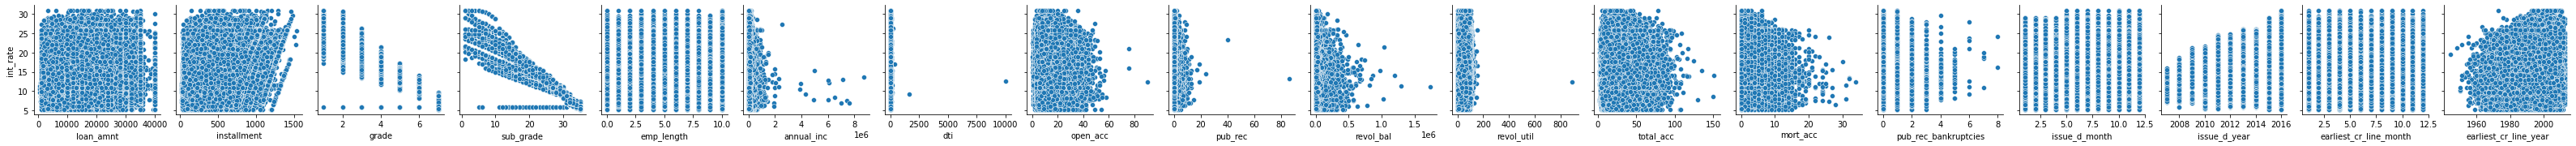

In [49]:
sns.pairplot(data=df, y_vars=["int_rate"], x_vars=[c for c in numeric_columns if c != 'int_rate'])

In [50]:
df1 = df.copy()

In [51]:
columns = ['revol_bal', 'emp_length', 'total_acc', 'initial_list_status', 'pub_rec_bankruptcies']
df.drop(columns = columns, inplace=True)

In [52]:
df.shape

(396030, 25)

- Also Loan Amount is highly correlated with Installment, so dropping installment column

In [53]:
df.drop(columns = 'installment',inplace=True)

In [54]:
df.head(1)

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_util,application_type,mort_acc,term_months,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_title_primary,emp_title_secondary,pin_code
0,10000.0,11.44,6,27,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,41.8,INDIVIDUAL,0.0,36,1,2015,6,1990,Marketing,NA,22690


## Feature Engineering

In [55]:
df1['loan_status'] = df1['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
df1['loan_status'] = df1['loan_status'].astype('int64')
df_old = df1.copy()

In [56]:
cat_cols

['home_ownership',
 'verification_status',
 'loan_status',
 'initial_list_status',
 'application_type',
 'term_months']

In [57]:
for column in cat_cols:
    if column == 'loan_status':
        continue
    df1 = pd.concat([df1, pd.get_dummies(df1[column], prefix=column)], axis=1)
    df1.drop(column, inplace=True, axis=1)
    df1.drop(df1.columns[-1], inplace=True, axis=1)

In [58]:
str_cols = [i for i in df1.columns if df1[i].dtype == 'object']

In [59]:
str_cols

['purpose', 'title', 'emp_title_primary', 'emp_title_secondary', 'pin_code']

#### Target Encoding

In [60]:
for column in str_cols:
    df1[column] = pd.Categorical(df1[column])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop(['loan_status'], axis=1), df1['loan_status'], random_state=0, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size = .2)

In [62]:
from category_encoders import TargetEncoder 

target_encoder = TargetEncoder(return_df=True)
X_train = target_encoder.fit_transform(X_train, y_train)

In [63]:
from sklearn.preprocessing import StandardScaler

X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)


In [64]:
X_train.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,annual_inc,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_title_primary,emp_title_secondary,pin_code,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,verification_status_Not Verified,verification_status_Source Verified,initial_list_status_f,application_type_DIRECT_PAY,application_type_INDIVIDUAL,term_months_36
0,0.706510,-0.288600,0.943220,0.616891,0.467393,-1.503313,-0.228923,0.480182,-0.799380,-0.307676,-0.256810,-0.343832,0.124890,1.406532,-0.961517,0.169552,-0.340984,0.422880,-0.424650,0.946547,-0.120101,-0.574540,-0.001005,-0.755998,-0.002809,0.997947,-0.007693,-0.016621,-0.324621,-0.679933,1.418838,0.815305,-0.026435,0.04264,0.557689
1,1.304839,1.753541,2.062782,-1.632414,-1.653034,0.882891,0.216926,0.480182,2.425053,0.047670,0.326897,-0.343832,0.577606,0.802483,-0.288983,-0.777470,-0.340984,1.299371,-1.099383,-1.381535,0.018898,3.432504,-0.001005,3.089521,-0.002809,-1.002058,-0.007693,-0.016621,-0.324621,-0.679933,-0.704802,-1.226535,-0.026435,0.04264,0.557689
2,-0.690587,0.153789,-0.580324,-0.132877,0.013016,0.087489,-0.342354,0.480182,-1.137744,-0.318402,0.132328,-0.343832,-0.536967,-0.691314,-0.709317,-0.777470,-0.340984,0.422880,-0.424650,1.237557,-1.510087,-0.574540,-0.001005,-0.755998,-0.002809,-1.002058,-0.007693,-0.016621,-0.324621,-0.679933,-0.704802,0.815305,-0.026435,0.04264,0.557689
3,0.024416,0.100166,0.231791,0.616891,0.315934,1.148025,0.390224,0.480182,0.623636,-0.736702,-1.035085,1.588566,-0.523054,-0.242358,-0.036782,-0.303959,2.478215,-0.453610,-0.424650,0.364527,-0.398098,-0.942673,-0.001005,-0.755998,-0.002809,0.997947,-0.007693,-0.016621,-0.324621,-0.679933,-0.704802,-1.226535,-0.026435,0.04264,0.557689
4,-1.220108,-0.145606,-1.196813,0.616891,0.315934,0.087489,-0.035144,0.480182,0.664557,0.561569,1.299742,-0.343832,0.253462,0.027015,0.299485,-0.303959,-0.340984,-0.453610,0.250083,0.655537,-0.259099,1.100205,-0.001005,-0.016847,-0.002809,0.997947,-0.007693,-0.016621,-0.324621,1.470734,-0.704802,-1.226535,-0.026435,0.04264,0.557689


In [65]:
X_train.shape, y_train.shape

((253459, 35), (253459,))

#### Applying Target Encoding and Standard Scaling to the Test and Validation Data.

In [66]:
X_test = target_encoder.transform(X_test)
X_val = target_encoder.transform(X_val)

In [67]:
X_test_columns=X_test.columns
X_test_std=std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_test_columns)
X_val_columns=X_val.columns
X_val_std=std.transform(X_val)
X_val=pd.DataFrame(X_val_std, columns=X_val_columns)

## Modelling

### Hyperparamter Tuning for Regularization Parameter

In [68]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc, r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [69]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 100000.0, 100):
    model= LogisticRegression(C=1/la)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)


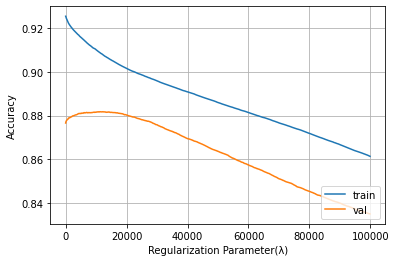

In [70]:
plt.figure()
plt.plot(list(np.arange(0.01, 100000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [71]:
np.max(val_scores), np.argmax(val_scores)

(0.8817801625503038, 112)

In [72]:
l_best = 0.01 + np.argmax(val_scores) * 100
l_best

11200.01

- BEST REGULARIZATION PARAMTER = 11200.01

### Logistic Regression

In [73]:
model= LogisticRegression(C=1/l_best)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

In [74]:
print(f"Training Score is {round(train_score, 3)}")
print(f"Validation Score is {round(val_score, 3)}")
print(f"Test Score is {round(test_score, 3)}")

Training Score is 0.909
Validation Score is 0.882
Test Score is 0.884


In [75]:
print(f"Model intercept is {model.intercept_}")

Model intercept is [-1.93561671]


In [76]:
pd.DataFrame(np.vstack([X_train.columns, model.coef_]).T, columns=['Feature', 'Model Coefficient']).sort_values(by='Model Coefficient', ascending=False)

,Feature,Model Coefficient
23,pin_code,1.011536
21,emp_title_primary,0.825043
8,title,0.299573
1,int_rate,0.105505
13,revol_util,0.102118
9,dti,0.09762
10,open_acc,0.076197
0,loan_amnt,0.048065
2,installment,0.022975
33,application_type_INDIVIDUAL,0.021418


From above,we can see that, the following are top 5 features which are impacting Loan Status: 

  1. pin_code
  2. emp_title_primary
  3. title
  4. int_rate
  5. revol_util

### Confusion Matrix

In [77]:
y_pred = model.predict(X_test)


Confusion Matrix
 [[62915   896]
 [ 8272  7123]] 



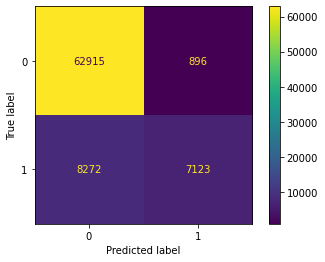

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix\n", conf_matrix, "\n")
ConfusionMatrixDisplay(conf_matrix).plot();

In [79]:
print(f"Precision Score is {precision_score(y_test, y_pred)}")
print(f"Recall Score is {recall_score(y_test, y_pred)}")
print(f"F1 Score is {f1_score(y_test, y_pred)}")

Precision Score is 0.8882653697468512
Recall Score is 0.46268268918480027
F1 Score is 0.608439395233621


- From above, we can see that there are high number of False Negatives,so we need to reduce imbalance in target variables to reduce the number of False negatives

## Treat Target variable Imbalance

In [80]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [81]:
X_over, y_over = undersample.fit_resample(df_old.drop('loan_status', axis=1), df_old['loan_status'])

In [82]:
df2 = pd.concat([X_over, y_over], axis=1)

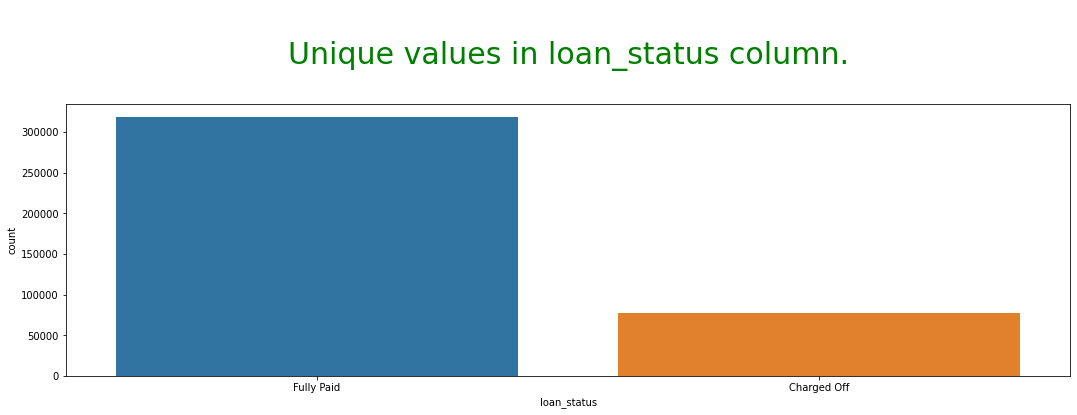

In [83]:
fig, axes = plt.subplots(figsize=(18,5))
sns.countplot(data=df, x='loan_status')
plt.title(f"\nUnique values in loan_status column.\n", fontsize=30, color="green")
plt.show()

### Feature Engineering and Scaling

In [84]:
continuous_types = ['float64', 'datetime64[ns]']
discrete_types = ['int64']
numeric_types = ['int64', 'float64']
categorical_types = ['category', 'bool']
get_columns_by_types = lambda df, types: [df.columns[index] for index in range(len(df.columns)) if df.dtypes[index].name in types]

In [85]:
for column in get_columns_by_types(df2, categorical_types):
    if column == 'loan_status':
        continue
    df2 = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df2.drop(column, inplace=True, axis=1)
    df2.drop(df.columns[-1], inplace=True, axis=1)

In [86]:
for column in get_columns_by_types(df2, ['string']):
    df2[column] = pd.Categorical(df2[column])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['loan_status'], axis=1), df2['loan_status'], random_state=0, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size = .2)

In [88]:
target_encoder = TargetEncoder(return_df=True)
X_train = target_encoder.fit_transform(X_train, y_train)

In [89]:
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [90]:
X_test = target_encoder.transform(X_test)
X_val = target_encoder.transform(X_val)

In [91]:
X_test_columns=X_test.columns
X_test_std=std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_test_columns)
X_val_columns=X_val.columns
X_val_std=std.transform(X_val)
X_val=pd.DataFrame(X_val_std, columns=X_val_columns)

### Hyperparameter Tuning to decide best Regularization Parameter.

In [92]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 100000.0, 100):
    model= LogisticRegression(C=1/la)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

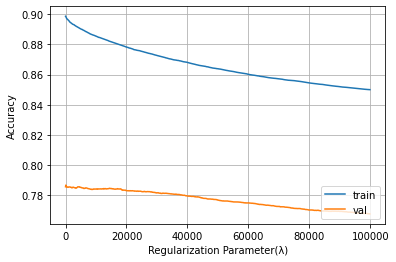

In [93]:
plt.figure()
plt.plot(list(np.arange(0.01, 100000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [94]:
np.max(val_scores), np.argmax(val_scores)

(0.7865706469262954, 1)

In [95]:
l_best = 0.01 + np.argmax(val_scores) * 100
l_best

100.01

**The best Regularization Parameter identified is 1700.01.**

### Training the Logistic Regression model.

In [96]:
model= LogisticRegression(C=1/l_best)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

In [97]:
print(f"Training Score is {round(train_score, 4)}")
print(f"Validation Score is {round(val_score, 4)}")
print(f"Test Score is {round(test_score, 4)}")

Training Score is 0.8985
Validation Score is 0.7866
Test Score is 0.7874


In [98]:
pd.DataFrame(np.vstack([X_train.columns, model.coef_]).T, columns=['Feature', 'Model Coefficient']).sort_values(by='Model Coefficient', ascending=False)


,Feature,Model Coefficient
28,pin_code,3.521967
26,emp_title_primary,1.484842
10,title,0.541759
11,dti,0.512523
21,term_months,0.25621
15,revol_util,0.16999
12,open_acc,0.160508
6,home_ownership,0.14382
1,int_rate,0.102437
0,loan_amnt,0.095377


From above,we can see that, the following are top 5 features which are impacting Loan Status: 

  1. pin_code
  2. emp_title_primary
  3. title
  4. term_months
  5. int_rate

In [99]:
y_pred = model.predict(X_test)

#### Confusion Matrix


Confusion Matrix
 [[12316  3052]
 [ 3553 12149]] 



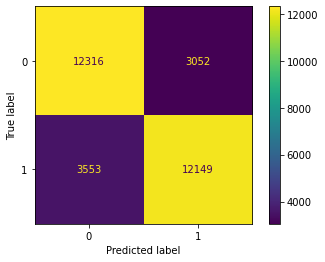

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix\n", conf_matrix, "\n")
ConfusionMatrixDisplay(conf_matrix).plot();

In [101]:
print(f"Precision Score is {precision_score(y_test, y_pred)}")
print(f"Recall Score is {recall_score(y_test, y_pred)}")
print(f"F1 Score is {f1_score(y_test, y_pred)}")

Precision Score is 0.7992237352805737
Recall Score is 0.7737230925996689
F1 Score is 0.7862667054978482


#### Precision - Recall Curve

In [102]:
y_score = model.predict_proba(X_test)[:, 1]

In [103]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

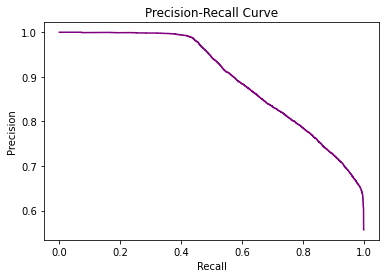

In [104]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [105]:
print(f"Area under precision Recall curve is {auc(recall, precision)}")

Area under precision Recall curve is 0.8994862155719545


#### ROC - AUC Curve

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

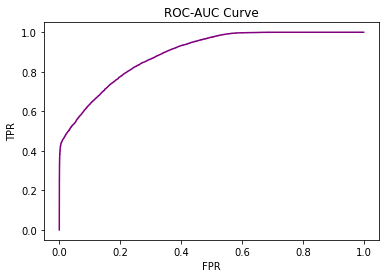

In [107]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')
ax.set_title('ROC-AUC Curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
plt.show()

In [108]:
print(f"Area under ROC-AUC curve is {auc(fpr, tpr)}")

Area under ROC-AUC curve is 0.8910725114775977


#### Accuracy - Threshold Curve

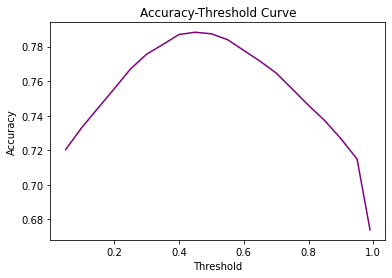

In [109]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for threshold in threshold_list:
    y_pred = np.vectorize(lambda x: 1 if x>threshold else 0)(y_score)
    scores += [round((y_pred == y_test).sum()/y_pred.shape[0], 4)]
fig, ax = plt.subplots()
ax.plot(threshold_list, scores, color='purple')
ax.set_title('Accuracy-Threshold Curve')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Threshold')
plt.show()

In [110]:
np.max(scores), np.argmax(scores)

(0.7883, 8)

In [111]:
print(f"Best performing Threshold value is {threshold_list[np.argmax(scores)]}")

Best performing Threshold value is 0.45


#### F1 - score Threshold Curve

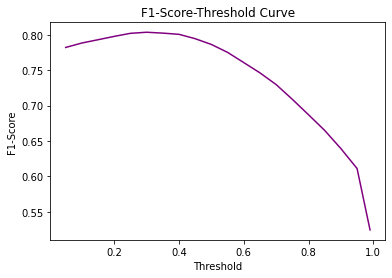

In [112]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for threshold in threshold_list:
    y_pred = np.vectorize(lambda x: 1 if x>threshold else 0)(y_score)
    scores += [f1_score(y_test, y_pred)]
fig, ax = plt.subplots()
ax.plot(threshold_list, scores, color='purple')
ax.set_title('F1-Score-Threshold Curve')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Threshold')
plt.show()

In [113]:
print(f"Area under ROC-AUC curve is {auc(fpr, tpr)}")

Area under ROC-AUC curve is 0.8910725114775977


In [114]:
print(f"Best performing Threshold value is {threshold_list[np.argmax(scores)]}")

Best performing Threshold value is 0.3


## Tradeoff Questions

Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

1. High number of False Positives or False Negatives can result from imbalance in the data. We have handled this case in section 15, by using undersampling technique to reduce imbalance in data.
2. False Positives can be reduced and as a result model accuracy can be increased by choosing the best performing Regularization Parameter. We have handled this case in section 17, by using Hyperparameter Tuning.
3. False Positives can also be reduced by increasing the threshold value. In the Accuracy-Threshold Curve we can see that the best performing threshold is 0.5 and if we increase our threshold value beyond that, the accuracy decreases. So, if we try to increase our threshold beyond 0.5, the number of False Positives might reduce but the number of False Nagatives will increase and True Positives will decrease.

For example, following is the Confusion Matrix resulted from using threshold value of 0.55 instead of 0.5.


Confusion Matrix
 [[12791  2577]
 [ 4135 11567]] 



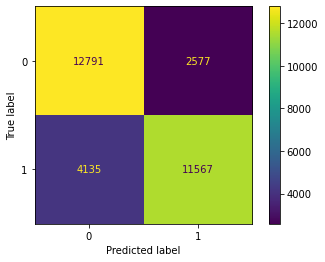

In [115]:
y_pred = np.vectorize(lambda x: 1 if x>0.55 else 0)(y_score)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix\n", conf_matrix, "\n")
ConfusionMatrixDisplay(conf_matrix).plot();

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

Ans:
1. Not disbursing loans at all would stop earnings through the interests and might result in the stunted growth. The crux of the problem is high number of False nagatives. If we manage to reduce False Negatives significantly, we can bear minimum losses and still keep on disbursing loans.
2. Steps to reduce False Nagatives are smilar to the steps we discussed for False Positive Reduction.
3. False Nagatives can also be reduced by decreasing the threshold value. In the Accuracy-Threshold Curve we can see that the best performing threshold is 0.5 and if we decrease our threshold value beyond that, the accuracy decreases. So, if we try to decrease our threshold beyond 0.5, the number of False Negatives might reduce but the number of False Positives will increase and True Negatives will decrease.

For example, following is the Confusion Matrix resulted from using threshold value of 0.45 instead of 0.5.


Confusion Matrix
 [[11785  3583]
 [ 2994 12708]] 



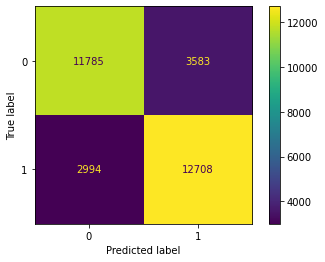

In [116]:
y_pred = np.vectorize(lambda x: 1 if x>0.45 else 0)(y_score)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix\n", conf_matrix, "\n")
ConfusionMatrixDisplay(conf_matrix).plot();

We observerd how decreasing False Positives might increase False Negatives. And decreasing False Negatives might increase False Positives. Since, the business wants to reduce both, we can
1. Go with the optimal threshold value detected keeping the balance between False Positives and False Nagatives as it its.
2. Go with another machine learning model which might yield better results.

## Questionnaire

1. What percentage of customers have fully paid their Loan Amount?

In [117]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

df['loan_status'].value_counts()/len(df)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

- Ans: 80.3% has fully paid their Loan Amount



---

2. Comment about the correlation between Loan Amount and Installment features.

Ans: The correlation between Loan Amount and Installment is very high (0.95). Since, these columns would introduce multicollinearity, we have removed Installment column from our model.

---


3. The majority of people have home ownership as _______

In [118]:
df['home_ownership'].value_counts() / len(df)

MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: home_ownership, dtype: float64

- Majority of people having House under Mortgage

---


4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [119]:
df[df['loan_status']=='Fully Paid'].groupby(['grade'])['grade'].count()/df.groupby(['grade'])['grade'].count()

grade
A    0.937121
B    0.874270
C    0.788191
D    0.711322
E    0.626366
F    0.572120
G    0.521611
Name: grade, dtype: float64

Ans: True

---




5. Name the top 2 afforded job titles.

In [120]:
df['emp_title'].value_counts().sort_values(ascending=False)

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
NEW YORK HOSPITAL OF QUEENS        1
Famous Dave's of America           1
Sig LLC                            1
HARVEST PARTNERS, LP               1
Gracon Services, Inc               1
Name: emp_title, Length: 173105, dtype: int64

Ans: Teacher and Manager

---


6. Thinking from a bank's perspective, which metric should our primary focus be on.

- ROC AUC
- Precision
- Recall
- F1 Score

- Ans. Thinking from a bank's perspective, our goal is to reduce both False Positives and False Negatives. Precision penalizes only the False Positives and Recall penalizes False Negatives. But, F1-Score takes into account both the Precision as well as Recall score. Hence, we should primarily focus on the F1-Score metric.



---



7. How does the gap in precision and recall affect the bank?

- Ans. Recall score is 0.79 and Precision score is 0.80. Which tells us that the number of False Positives is roughly same as the number of False Negatives. If Recall value is low (False Negatives are high), it means that the Bank is loosing in opportunity cost. If Precision value is low (False Positives are high), it means that the Bank's NPA (defaulters) may increase



---


8. Which were the features that heavily affected the outcome?

In [121]:
c = pd.DataFrame(np.vstack([X_train.columns, np.abs(model.coef_)]).T, columns=['Feature', 'Model Coefficient']).sort_values(by='Model Coefficient', ascending=False)
c.head()

,Feature,Model Coefficient
28,pin_code,3.521967
26,emp_title_primary,1.484842
10,title,0.541759
11,dti,0.512523
21,term_months,0.25621


Ans. Pin Code is the most significant feature followed by emp_title_primary, title, term_months,sub_grade. Since, we removed Grade and Interest Rate which were highly correlated with sub_grade, they're also equally significant features.


---



9. Will the results be affected by geographical location? (Yes/No)

Ans: Yes, the results are highly affected by Pin-code



---



# Business Insights:

- The ratio of loan payers:defaulters is 80:20
- Loan amount is a right tailed distribution (which is logical since there are very few people which take very
large loan amount) with irregular peaks in between
- 75% of people take loan of 36 months while only 25% take loan for 60 months (probably due to higher
interest accumulation with growing time period)
- 70% of the customers have been issued loans with interest rate between 10-20%4. 70% of the customers have been issued loans with interest rate between 10-20%
- Installment is also a right tailed distribution with 60% of installment amounts lie between 200 and 600
- Most clients who have taken loan belong to B or C grades (roughly 50%)
- Employee title seems to have a lot of variance in it and hence seems an important feature
- 30% of the clients have more than 10 Years Of Experience, the distribution in rest categories is more or less
similar
- Majority of the applications of are type Individual.
- Most loans are for term length 36 months instead of 60 months.
- Loans with higher interest rates have more cases of defaulting.
- Loans with higher Grades/Sub-Grades have less cases of defaulting.
- Most of the loans funded after 2014 have initial list status as W instead of F.
- Loans with Direct Pay applications have higher interest rates, higer dti ratio and lower grades/sub_grades.
- Loans with tenure of 60 months have higher loan amounts, higher interest rates, but lower grades/sub-grades.
- Grade, Sub-Grade and Interest Rates have very high correlation between them.
- The following variables seem to have a weak correlation with the target variable (and hence are not very
much relevant for modeling): Loan amount, installment, verification_status, issue_year,
number_of_derogatory_public_records, revolving_line_util_rate, utilized_credit_lines,
number_of_mortgage_accounts
- The following variables seem to have a strong correlation with the target variable (and hence are important
features for modeling): Term, interest rate, grade, sub-grade, home ownership, annual income, purpose, dti,
pincode
- There are significant outliers in most of the numerical fields which are handled by capping the min and max
values to Q1-1.5*IQR and Q3+1.5*IQR respectively
- After training the logistic regression model, the 5 most important features are: Pincode, employee_title,
sub_grade, grade and purpose
- The 5 least important features are: Number of mortgage accounts, Employee length of service, The total
number of credit lines currently in the borrower's credit file, Number of derogatory public records, Number
of public record bankruptcies
- The final model trained had good precision and recall for the loan payers class, while, it had good preicision
for the defaulters class but not so good recall which indicates that it is able to minimize the FP and thus is
not rejecting any potential paying back customer while it is not able to minimize FN to such a good extent
which means some of the loans it is giving can be turned to NPA but since LoanTap is a fast growing
startup, optimizing Precision is more important than optimizing recall as it has to focus on generating
Revenue while some losses are okay

# Recommendations

- To predict Loan Status, the columns pin_code, emp_title_primary, int_rate, grade sub_grade, title, term_months_36 should be considered.
- Since pincode (geographical area) is the most important feature in determining whether the customer will
pay back or default, LoanTap should not give loans to customers living in pincodes: 11650, 93700, 86630 as
they are most likely to default on loans while it can safely give loans to customers living in pincodes: 813,
5113 and 29597 as they are most likely to pay back on time
- Since grade/subgrade assigned to each customer by LoanTap is an important feature, LoanTap should give
loans to customers with grade A and B as they are most likely to pay back loans while it should not give
loans to customers with grades F and G are most likely to default
- Since employee_title is an important feature, LoanTap should given loans to employees with titles having
terms like architect and software in it as they are mostly likely to pay back loans since these are white collar
stable jobs while it should refrain from giving loans to employees having terms like laborers, owners and
painters in their job as they are most likely to default because these are unstable and low paying jobs
- Since interest rate is also an important feature, LoanTap should avoid giving loans at high interest rates
because those customers are more likely to default as compared to customers who have taken loan on
lower interest rates
-  Since employee title is an important feature so LoanTap should allow customers to choose from a pre-
defined list of titles instead of manually filling these, in this way, cleaner data can be obtained for this field
and hence the predictions will be more accurate
- While disbursing loans, banks should check address and locality of a person since some geographical locations have higher rates of defaulting compared to others.
- While disbursing loans, banks should also check profession of a person since some professions have higher rates of defaulting compared to others.
-  Factors such as Monthly income, age, current debt should also be considered and tested for their effect on the 'Loan Status' for improving the prediction model.
- Since increase in loan amount reduces the probability of loan repayment, it is better to look into supporting metrics(for example: credit score, cisf score etc.) before rolling out loans to potential customers.
- At the same time increase in interest rate reduces the probability of loan repayment. So, either LoanTap should increase the loan cycle/period before rolling out loans to potential customers or offer loans at relatively less interest rate for short period.
- We, also see that increase in installment period increases the probability of loan repayment. So, LoanTap should provide less loan amount in terms of volume to customers with high risk profile for long duration. As that might increase their ability to repay the loan on time.
 